# Calidad del vino tinto

**CONTEXTO:**

Se trabaja con un dataset de la variante tinta del "Vinho verde" del norte de Portugal (para más detalles, consultar http://www.vinhoverde.pt/en/) porque, ¿a quién no le gusta el vino?. El objetivo es modelar la calidad del vino basándose en pruebas físico-químicas (ver [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/). Debido a cuestiones de privacidad y logística, solo están disponibles variables fisicoquímicas (entradas) y sensoriales (salidas) (por ejemplo, no hay datos sobre tipos de uva, marca de vino, precio de venta del vino, etc.). Link al dataset: https://archive.ics.uci.edu/dataset/186/wine+quality.

El objetivo principal es recopilar las características del vino que contribuyen a una mejor calidad del mismo (*Identificación de alguna variable que no aporta mucho por ejemplo*).

El tamaño del conjunto de datos es de 1599 muestras, que tienen doce campos, donde once campos son para la entrada y uno para salida.

Acidez fija, Acidez volátil, Ácido cítrico, Azúcar residual, Cloruros, Dióxido de azufre libre, Dióxido de azufre total, Densidad, pH, Sulfatos y Alcohol representan los campos de entrada.

El campo de salida corresponde a la calidad del vino, que es un puntaje entre 0 y 10.

**Columnas en el Dataset**

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity: Acidez fija
* volatile acidity: Acidez volátil
* citric acid: Ácido cítrico
* residual sugar: Azúcar residual
* chlorides: Cloruros
* free sulfur dioxide: Dióxido de azufre libre
* total sulfur dioxide: Dióxido de azufre total
* density: Densidad
* pH: pH
* sulphates: Sulfatos
* alcohol: Alcohol

Variable de salida (basada en datos sensoriales):
* quality: Calidad (puntaje entre 0 y 10)

# Preprocesamiento de datos

Importación de módulos y librerías útiles

In [1]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1QHRnpj1kulEP4OvDBz3RrUVO51CnzADD&confirm=t" -O wine+quality.zip

--2023-11-08 00:14:33--  https://drive.google.com/uc?export=download&id=1QHRnpj1kulEP4OvDBz3RrUVO51CnzADD&confirm=t
Resolving drive.google.com (drive.google.com)... 108.177.127.100, 108.177.127.139, 108.177.127.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bvr44bj7716e1ir25hjm208cp2at0jeg/1699402425000/09057352464867295131/*/1QHRnpj1kulEP4OvDBz3RrUVO51CnzADD?e=download&uuid=2dc3de07-2071-484b-a90b-28cf88ef43ac [following]
--2023-11-08 00:14:34--  https://doc-04-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bvr44bj7716e1ir25hjm208cp2at0jeg/1699402425000/09057352464867295131/*/1QHRnpj1kulEP4OvDBz3RrUVO51CnzADD?e=download&uuid=2dc3de07-2071-484b-a90b-28cf88ef43ac
Resolving doc-04-3o-docs.googleusercontent.com (doc-04-3o-docs.googleusercontent.com)... 108.177

In [3]:
!unzip wine+quality.zip

Archive:  wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       


In [4]:
# Lectura del dataset
dataset = pd.read_csv("winequality-red.csv", sep = ';')

In [5]:
# Para visualizar un fragmento de los datos
dataset.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
# Para visualizar tipos de datos, cantidades, etc.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Se observa que todas las variables son numéricas (las de entrada flotantes y la de salida 'quality' entera).

### Análisis de nulos

In [7]:
dataset.isna().sum().sort_values(ascending = False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Afortunadamente no hay datos nulos en el dataset.

### Registros repetidos

In [8]:
# Para ver si existen filas con la misma información
dataset.duplicated().sum()

240

In [9]:
# Quitamos las repetidas
dataset.drop_duplicates(inplace=True)

### Análisis de outliers

In [10]:
dataset.describe()
# Genera los descriptores estadísticos básicos

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

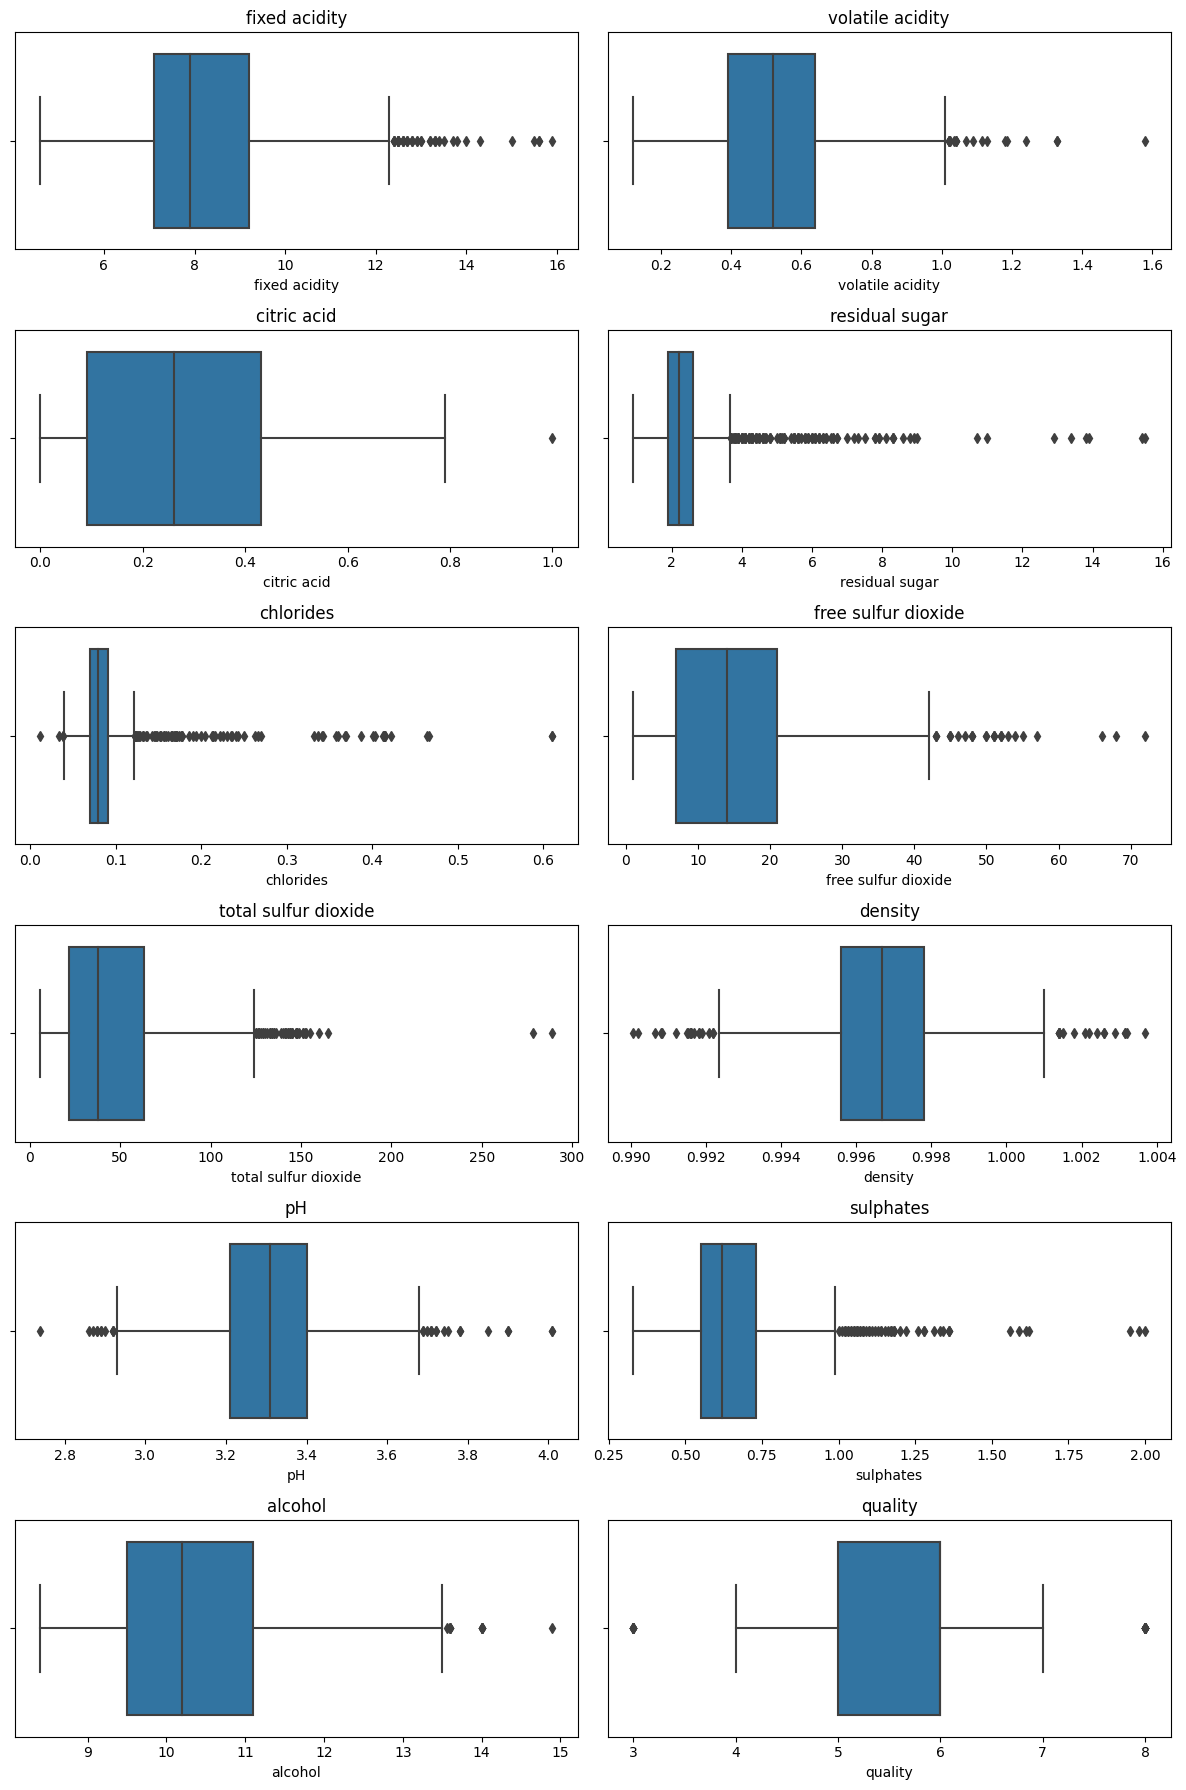

In [11]:
from math import ceil
num_filas = ceil(len(dataset.columns)/2)
num_columnas = 2

fig, ax = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(12, 3 * num_filas))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(dataset.columns):
    sns.boxplot(x=col, data=dataset, ax=ax[i // num_columnas, i % num_columnas])
    ax[i // num_columnas, i % num_columnas].set_title(col)

plt.tight_layout()  # Ajusta automáticamente el espaciado de los subplots
plt.show()

### EDA Variables Categóricas

Tomo la decisión de separar los vinos buenos ('good wine') de los malos ('bad wine') según si la variable 'quality' es mayor o menor a 5.5 respectivamente.

In [12]:
 dataset['quality'] = dataset['quality'].apply(lambda x: 'good wine' if x > 5.5 else 'bad wine')

In [13]:
# Categorías disponibles en las variables categóricas
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        print(col,"->", dataset[col].unique())

quality -> ['bad wine' 'good wine']


### Generación de Insights

Cuantificación del problema: ¿Cuál es la tasa de vinos buenos y vinos malos?

In [14]:
dataset.quality.value_counts(normalize = True) * 100

good wine    52.906549
bad wine     47.093451
Name: quality, dtype: float64

<Axes: ylabel='quality'>

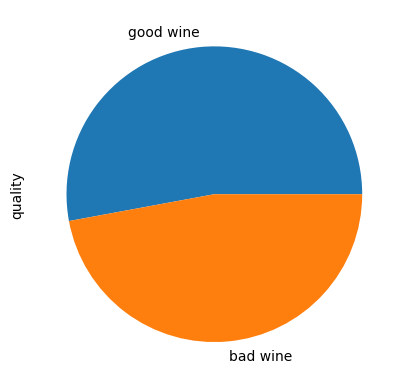

In [15]:
# Ejemplo de gráfica para una idea de las distribuciones
# En este caso... todo está medianamente equilibrado
dataset['quality'].value_counts().plot.pie()

<ipython-input-16-651d37fbdd02>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dataset.corr(), annot=True)


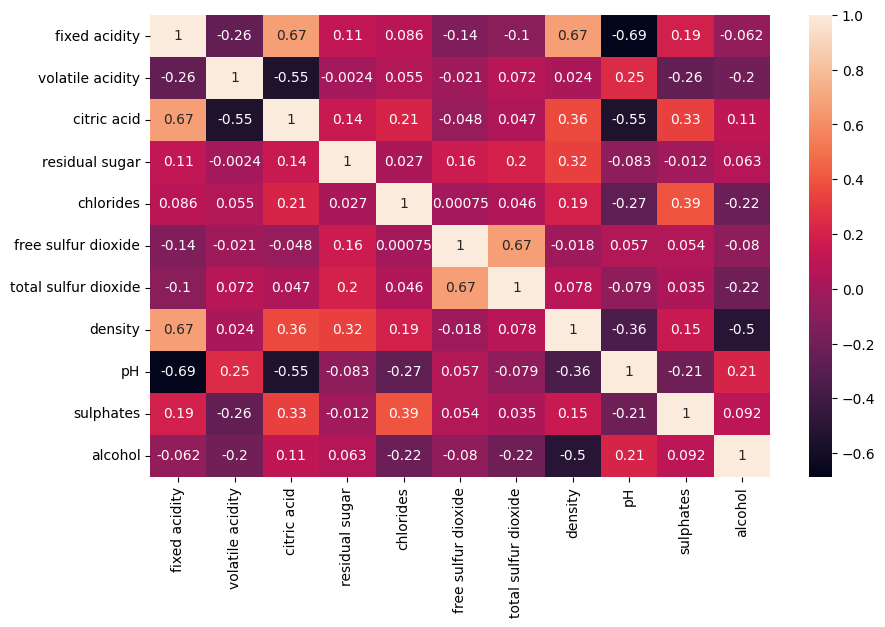

In [16]:
# Mapa de correlaciones, se puede observar dependencias entre columnas. Permite descartar descriptores que no aportan información nueva por ejemplo (resta costo computacional, etc.)
# Antes de plantear cualquier modelo, existe un gran trabajo de procesamiento y análisis de los datos. Herramientas Estadísticas juegan un rol fundamental.
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# En este caso, por ejemplo, no se observan fuertes relaciones entre las variables. Por lo tanto, en principio existe información útil en todas.
# NOTA: variables aletorias tampoco estarán correlacionadas, pero en este punto, asumimos que anteriormente validamos que estas variables "tienen que ver" con nuestro problema.

Vemos que las variables más correlacionadas son:


*   'fixed acidity' y 'pH' (-0.69)
*   'fixed acidity' y 'citric acid' (0.67)
*   'fixed acidity' y 'density' (0.67)
*   'free sulfur dioxide' y 'total sulfur dioxide' (0.67)
*   'volatile acidity' y 'citric acid' (-0.55)
*   'citric acid' y 'pH' (-0.55)
*   'density' y 'alcohol' (-0.5)

Concluimos que en primer lugar podríamos eliminar las variables 'fixed acidity' y 'citric acid' por estar altamente correlacionadas con las demás.
En segundo lugar podríamos eliminar las variables 'free sulfur dioxide' y 'density' por ejemplo.
Por ahora trabajaremos con el dataset completo.










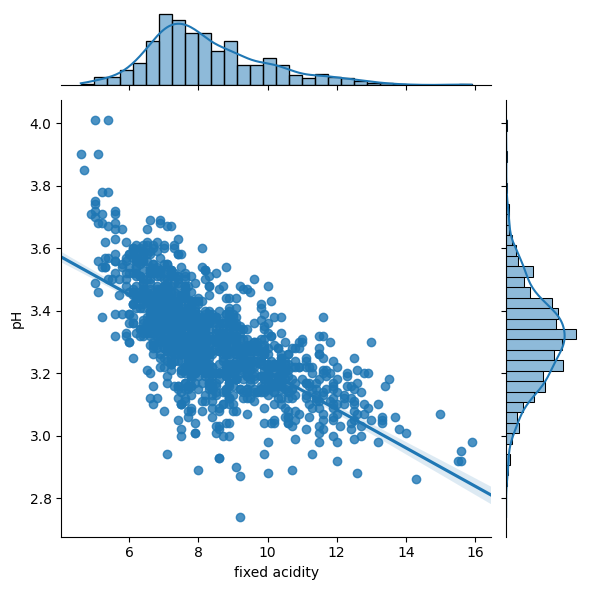

In [17]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="fixed acidity", y="pH", data=dataset,
                  kind="reg", truncate=False)

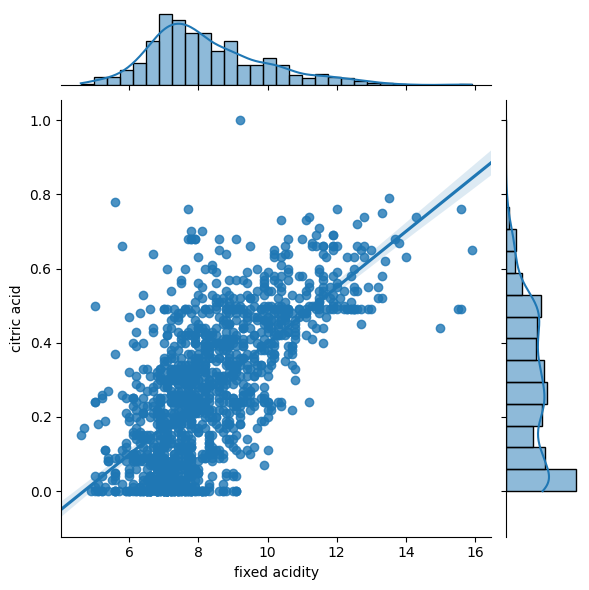

In [18]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="fixed acidity", y="citric acid", data=dataset,
                  kind="reg", truncate=False)

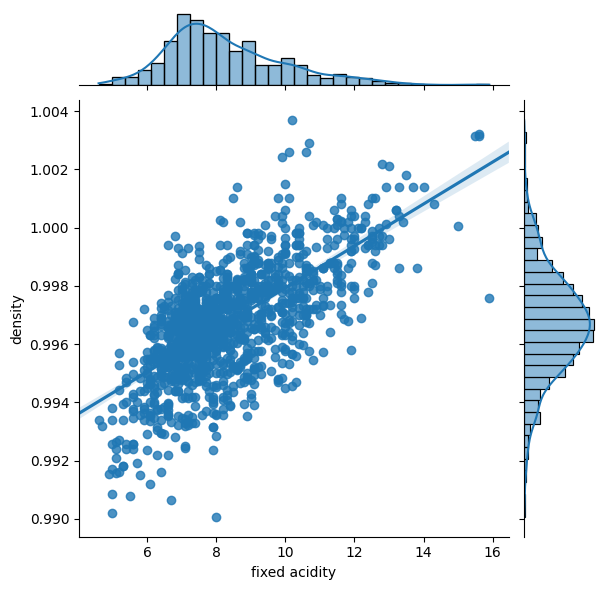

In [19]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="fixed acidity", y="density", data=dataset,
                  kind="reg", truncate=False)

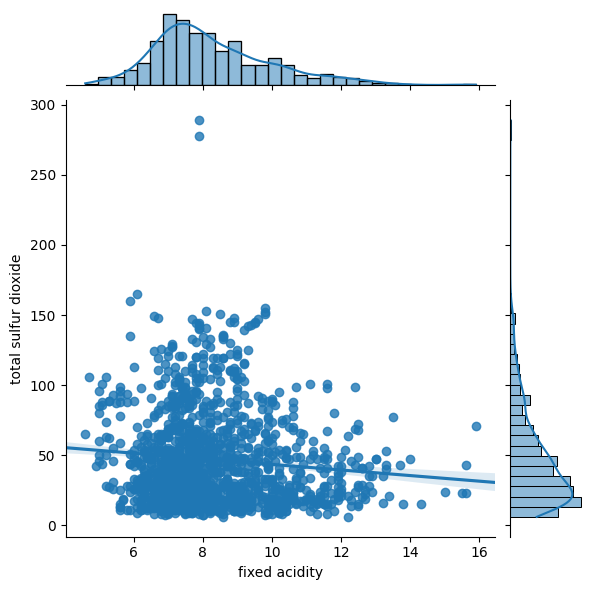

In [20]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="fixed acidity", y="total sulfur dioxide", data=dataset,
                  kind="reg", truncate=False)

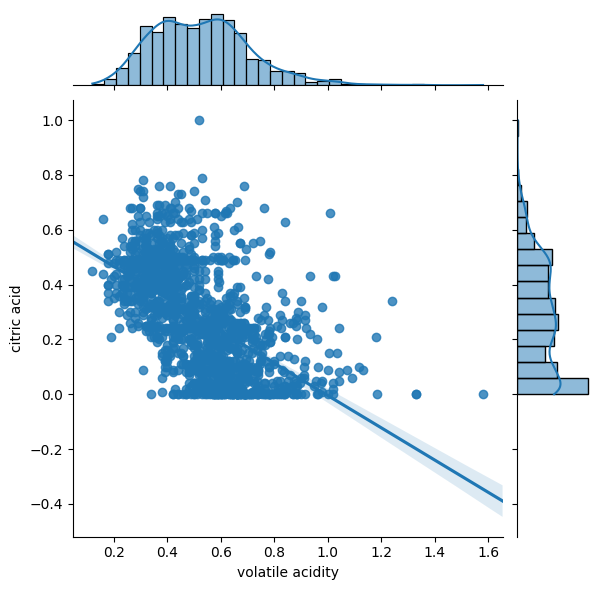

In [21]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="volatile acidity", y="citric acid", data=dataset,
                  kind="reg", truncate=False)

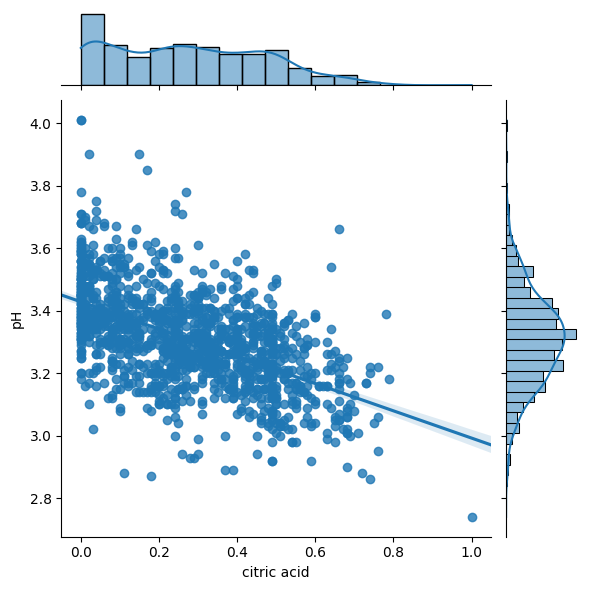

In [22]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="citric acid", y="pH", data=dataset,
                  kind="reg", truncate=False)

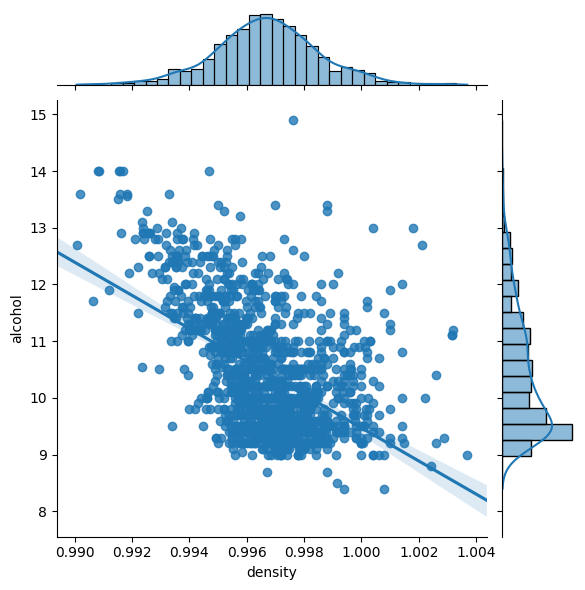

In [23]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="density", y="alcohol", data=dataset,
                  kind="reg", truncate=False)

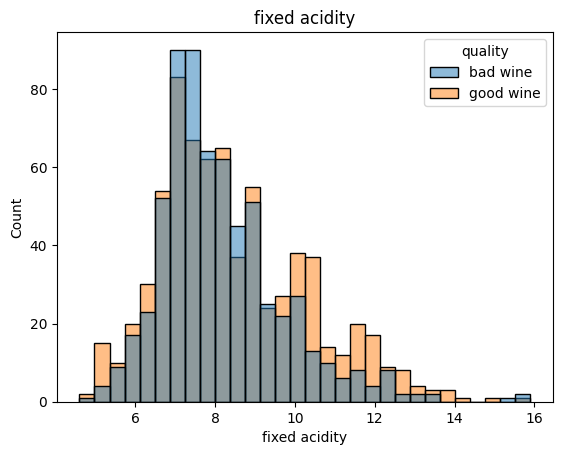

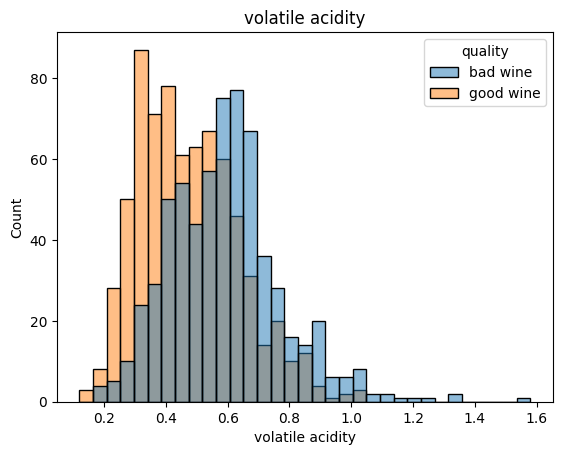

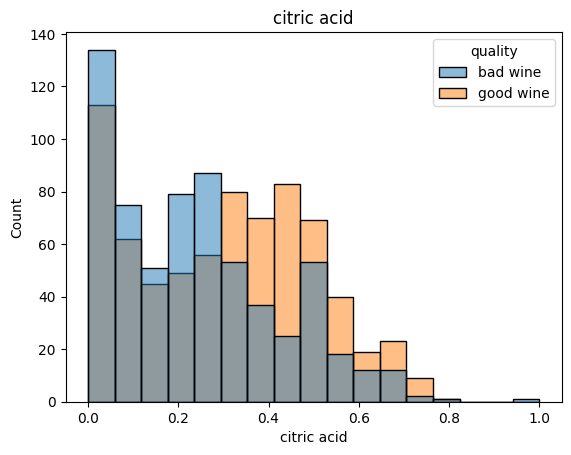

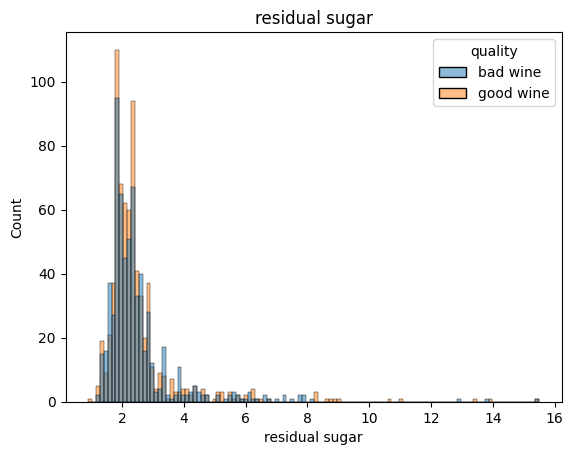

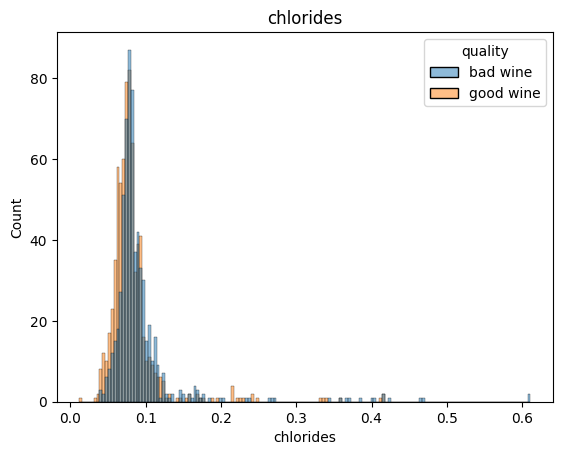

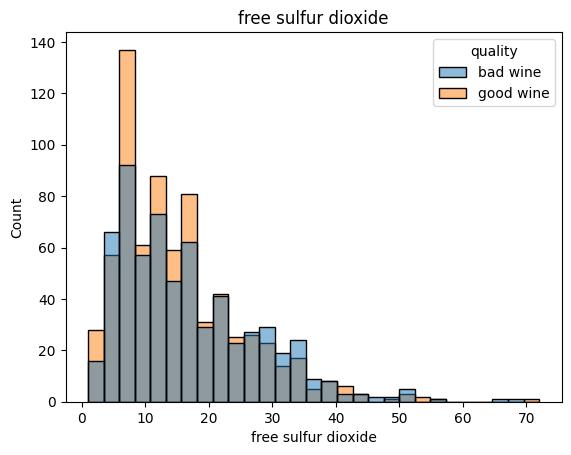

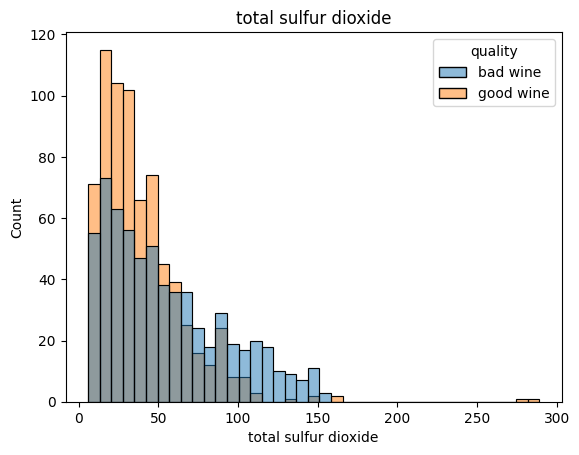

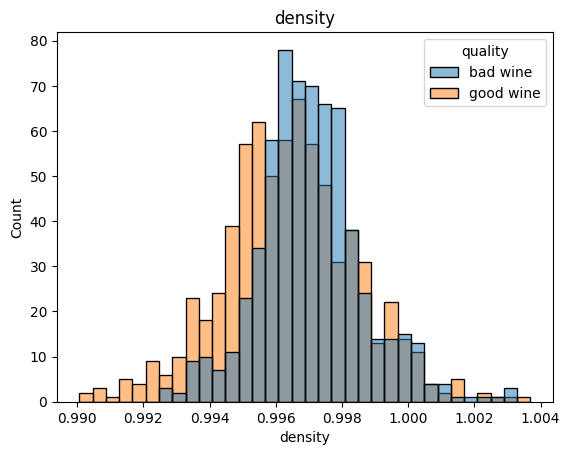

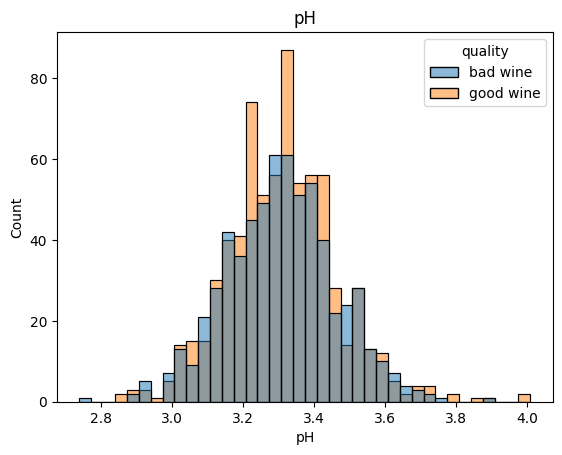

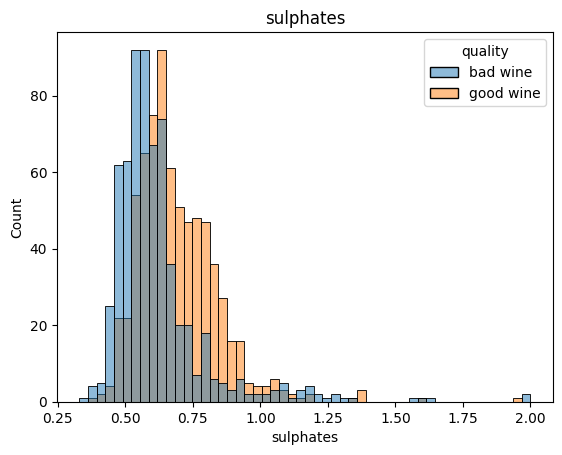

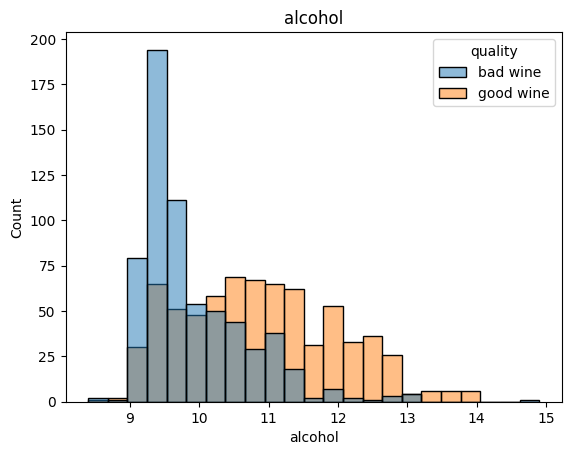

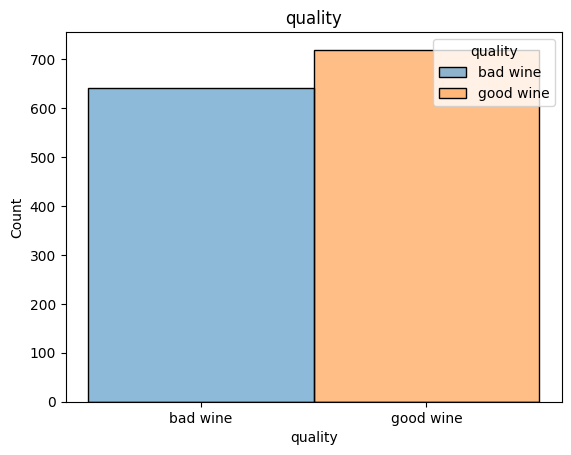

In [24]:
# Más ejemplos de gráficas. Distribuciones respecto a la salida
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='quality')
    plt.show()

# Se aprecia por ejemplo, que existen superposiciones en los rangos de las variables. Por lo tanto, no sería tan sencillo clasificar las clases de salida
# y obtener una precisión buena con simples secuencias de selección (IF anidados por ejemplo, en dónde se establece un umbral estricto).

Pareciera que:

*   A menor cantidad de 'volatile acidity' y 'total sulfur dioxide', mejor la calidad del vino.
*   A mayor cantidad de 'sulphates' y de 'alcohol', mejor la calidad del vino.

Por lo que estas 4 variables deberían ser de importancia.

En cambio las variables 'residual sugar', 'chlorides' y 'pH' pareciera que no aportan demasiada información acerca de la calidad del vino.



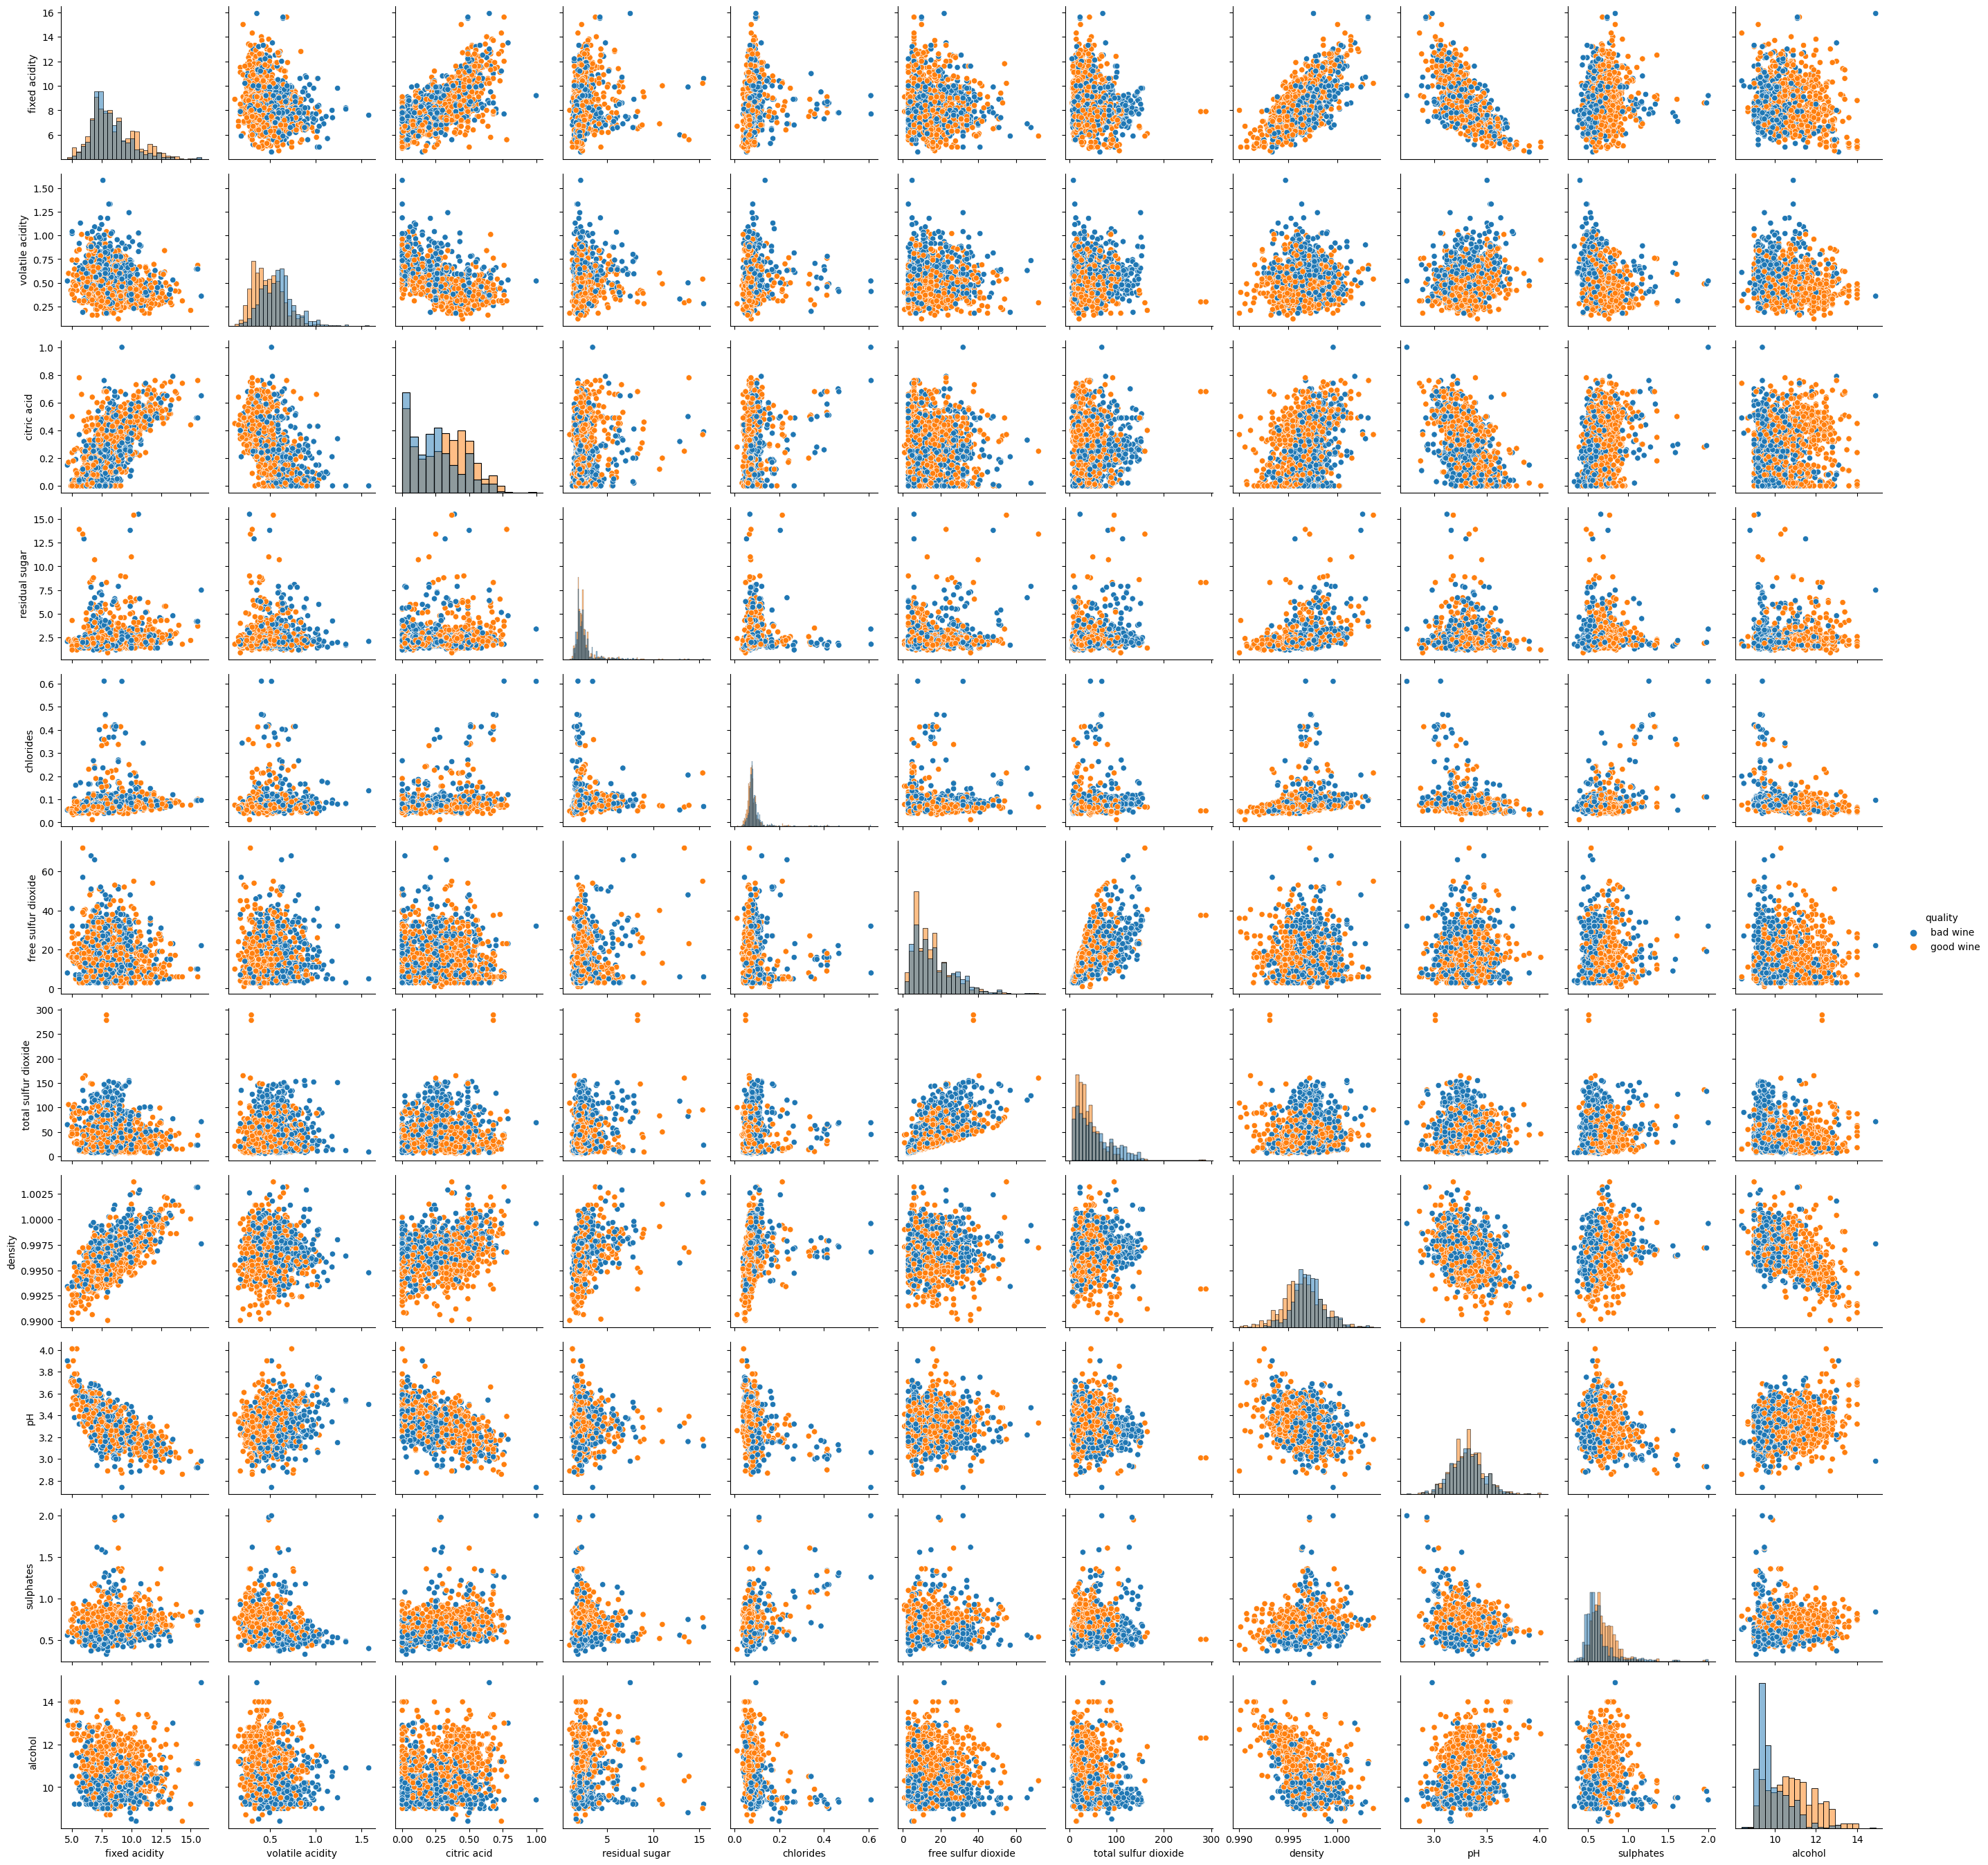

In [25]:
g = sns.PairGrid(dataset, hue="quality")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [26]:
dataset_ml = dataset.copy()

In [27]:
# Tratamiento de los datos y división del dataset

# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset_ml.pop('quality')
print("Y antes:\n", y[:10])

# Preprocesamiento
# Se codifica numéricamente la categoría definida con etiquetas: en lugar de “bad wine” y “good wine” en la clase, queda 0 y 1.
le = LabelEncoder()

y = le.fit_transform(y)     # Con le.inverse_transform() recuperamos luego la etiqueta original
print("Y después: ", y[:10])

Y antes:
 0      bad wine
1      bad wine
2      bad wine
3     good wine
5      bad wine
6      bad wine
7     good wine
8     good wine
9      bad wine
10     bad wine
Name: quality, dtype: object
Y después:  [0 0 0 1 0 0 1 1 0 0]


### Escalado de datos numéricos

Estandarizamos:

In [28]:
from sklearn.preprocessing import StandardScaler

# Estandarización por Z-score
scaler = StandardScaler()
dataset_stan = pd.DataFrame(scaler.fit_transform(dataset_ml), columns=dataset_ml.columns)
dataset_stan

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.524431          0.932000    -1.393258       -0.461157  -0.245623   
1         -0.294063          1.915800    -1.393258        0.056665   0.200094   
2         -0.294063          1.259934    -1.188617       -0.165259   0.078535   
3          1.664067         -1.363534     1.471711       -0.461157  -0.265883   
4         -0.524431          0.713378    -1.393258       -0.535132  -0.265883   
...             ...               ...          ...             ...        ...   
1354      -0.869983          0.494756    -0.983977       -0.461157  -0.407702   
1355      -1.215536          0.385444    -0.983977       -0.387183   0.038015   
1356      -1.388312          0.112167    -0.881656       -0.239233  -0.529261   
1357      -1.388312          0.631395    -0.779336       -0.387183  -0.265883   
1358      -1.330720         -1.199567     1.011270        0.796410  -0.427962   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.468554             -0.384050  0.584003  1.291872   
1                0.872003              0.604073  0.048737 -0.708395   
2               -0.085537              0.214813  0.155790 -0.321247   
3                0.105971              0.394471  0.691057 -0.966495   
4               -0.277045             -0.204391  0.584003  1.291872   
...                   ...                   ...       ...       ...   
1354             1.159265             -0.264277 -0.106490  0.711149   
1355             1.542281             -0.084619 -0.968269  0.904724   
1356             2.212559              0.124983 -0.850510  1.356397   
1357             1.542281             -0.084619 -0.663167  1.679021   
1358             0.201725             -0.144505 -0.652461  0.517575   

      sulphates   alcohol  
0     -0.578561 -0.954374  
1      0.124822 -0.584575  
2     -0.051024 -0.584575  
3     -0.461331 -0.584575  
4     -0.578561 -0.954374  
...         ...       ...  
1354   0.945435 -0.861924  
1355  -0.461331  0.062574  
1356   0.593744  0.709723  
1357   0.300667 -0.214775  
1358   0.007591  0.524824  

[1359 rows x 11 columns]

### Separación predictoras y target

In [29]:
y.shape

(1359,)

In [30]:
# Cantidad de datos a procesar.
print("Tamaño actual - Salida:", y.shape)

Tamaño actual - Salida: (1359,)


In [31]:
X = np.asarray(dataset_stan) # Esto se puede hacer directamente porque para "y" se usó pop sobre el dataframe.
print("Tamaño actual - Entrada:", X.shape) # Es importante que el tamaño sea consistente entre X e y (Entrada y Salida)

Tamaño actual - Entrada: (1359, 11)


## Información Mutua

In [32]:
from sklearn.feature_selection import mutual_info_regression
# Para clasificación, el módulo se llama: mutual_info_classif

print("Información mutua:",
      mutual_info_regression(X, y))   # Todas respecto a la salida, acá me interesa que las variables tengan relación con la salida.

Información mutua: [0.00684117 0.06283134 0.         0.         0.03900609 0.00737539
 0.07941144 0.01006426 0.         0.08480801 0.11285182]


In [33]:
# Convert to DataFrame for easier visualization
df_importances = pd.DataFrame({
    'Variables': dataset_ml.columns,
    'Información Mutua': mutual_info_regression(X, y),
})

df_importances.sort_values(by='Información Mutua', ascending=False)

Variables  Información Mutua
10               alcohol           0.134069
9              sulphates           0.081657
6   total sulfur dioxide           0.051320
1       volatile acidity           0.050938
4              chlorides           0.034050
7                density           0.023633
5    free sulfur dioxide           0.015144
8                     pH           0.011998
0          fixed acidity           0.006036
2            citric acid           0.005116
3         residual sugar           0.002871

Observemos que las 4 primeras variables son las que previamente consideramos más relevantes para la variable de salida y las 7 siguientes son las que descartábamos por correlación o por ser poco relevantes para la variable de salida.

Nota de color: La más relevante de todas es la variable ‘alcohol’, ¿por qué será? :)

# Clasificación

**Comparación de Clasificadores**

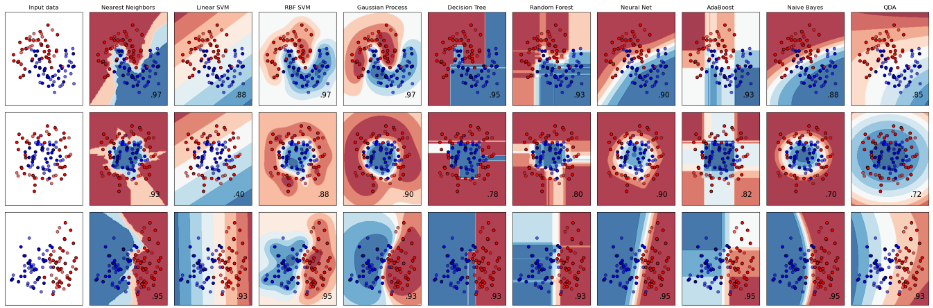

## Diseño de la modelización

### Separación train y test

In [34]:
# División del dataset
# test_size: indica el porcentaje destinado a test/validacion
# random_state: un valor aleatorio cualquiera, sirve para garantizar repetibilidad. En este caso, en referencia a la subdivisión del set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
X_train.shape

(1087, 11)

In [36]:
X_test.shape

(272, 11)

## Entrenamiento y predicción de modelos

In [37]:
# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

In [38]:
def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

Agrupo algunas métricas de interés para evaluar y comparar múltiples modelos.

Al final, la idea es tener una tabla que resuma todo. Con esto, decidir qué modelo es el que presenta las prestaciones que me sirven.

In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
import time

# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))

    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]

## Regresión Logística

In [40]:
# Modelos para clasificación

from sklearn.linear_model import LogisticRegression

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_clf = LogisticRegression()    # Se instancia el modelo, parámetros por defecto
lr_clf.fit(X_train, y_train)   # Datos para entrenar, Entrada y Salida.
end_train = time.time()

# Predicciones
pred_lr = lr_clf.predict(X_test)   # Con la Entrada para test, se evalúa la predicción de Clase del modelo
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_lr))   # Se computan métricas comparando lo que debería de ser la salida con lo que predijo el modelo
muestra_metricas("LogisticRegression", y_test, pred_lr, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       120
           1       0.75      0.68      0.71       152

    accuracy                           0.69       272
   macro avg       0.69      0.69      0.69       272
weighted avg       0.70      0.69      0.69       272

#######################################
Accuracy: 69.12%
Recall: 69.12%
Precision: 69.69%
F1-Score: 69.22%
MCC: 38.33%
Tiempo de entrenamiento: 0.0232 s
Tiempo de predicción: 0.0004 s
Tiempo total: 0.0237 s
#######################################


### **Pequeña defición de lo que se ve en la tabla del reporte:**

**Precision** es la proporción de predicciones positivas que fueron correctas. Es decir, cuántos de los casos que tu modelo predijo como positivos, realmente eran positivos.

**Recall** es la proporción de casos reales positivos que fueron correctamente identificados. O sea, de todos los casos positivos reales, cuántos pudo identificar tu modelo.

**F1-score** es la media armónica de precision y recall. Resume la precisión y sensibilidad de un modelo en una sola métrica.

**Support** indica el número de muestras de cada clase que se usaron para calcular las métricas.

+ Precision: ¿Qué tan precisas son las predicciones positivas?
+ Recall: ¿Qué fracción de los reales positivos se detectó?
+ F1-score: Balance entre precisión y recall
+ Support: Número de muestras por clase.

A la hora de la verdad, lo ideal es que todo esté en `1`. `0` es lo peor.

La parte de abajo de la tabla, presenta métricas globales para todas las clases. Incluso ponderando la cantidad de muestras.

**Macro avg**: Es el promedio simple de las métricas calculadas por clase. Es decir, calcula la métrica (precision, recall, f1-score) por cada clase de forma independiente, y luego promedia esos valores. No tiene en cuenta el tamaño de clase.

**Weighted avg**: Es el promedio ponderado de las métricas calculadas por clase. Toma en cuenta la frecuencia o tamaño de cada clase para calcular el promedio. Le da más peso a las clases más grandes.

+ Macro avg: Promedio simple de métricas por clase. No considera tamaños.
+ Weighted avg: Promedio ponderado por clase. Considera tamaños de clase.

Usar macro avg nos da la métrica promedio sin importar la distribución. Weighted avg considera la prevalencia de clases y puede ser más representativo.

Según el problema, los tipos de datos y demás... conviene mirar una u otra métrica. Ciertos modelos, pueden funcionar mejor para resaltar alguna de ellas.

In [41]:
le.classes_     # Categorías guardadas en el label encoder

array(['bad wine', 'good wine'], dtype=object)

In [42]:
labels = le.inverse_transform((0, 1))    # Podemos pedir la trasformación inversa, es decir, de las etiquetas numéricas a la categórica en string

In [43]:
labels

array(['bad wine', 'good wine'], dtype=object)

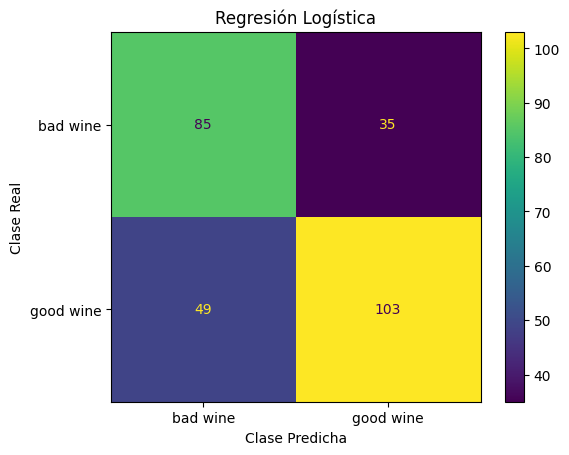

In [44]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=labels, model_name="Regresión Logística")

Ahora... se confunde bastante el modelo.

### Balance de Clases

Algunos modelos, permiten dar un peso diferente a cada clase. Es decir, que el hecho de equivocarse en la clasificación de determinada categoría, implique una penalización mayor o menor.
Para dominios de enfermedad, por lo general, es prioritario encontrar a todos los pacientes afectados.
En este caso, podríamos pensar que todos los vinos predichos como buenos serán probados para ver si realmente lo son, por lo que será prioritario **predecir lo menos posible como vino malo a un vino que en realidad es bueno** ya que lo descartaríamos sin probarlo.

In [45]:
modelo_lr_pesos = LogisticRegression(class_weight={0:1, 1:2})    # Este argumento, cambia el peso de las clases. 1 vendría a ser la positiva para infarto.
                                                                 # Le damos una importancia de 2 respecto a 1 para no infarto.
                                                                 # Estos valores en los pesos dependen del problema, naturaleza de los datos y demás.
                                                                 # En algunos dominios de problema, este peso podría conocerse (qué tanto cuesta no detectar a alguien enfermo, por ejemplo)
modelo_lr_pesos.fit(X_train, y_train)   # Datos para entrenar, Entrada y Salida.

LogisticRegression(class_weight={0: 1, 1: 2})

In [46]:
pred_lr_pesos = modelo_lr_pesos.predict(X_test)

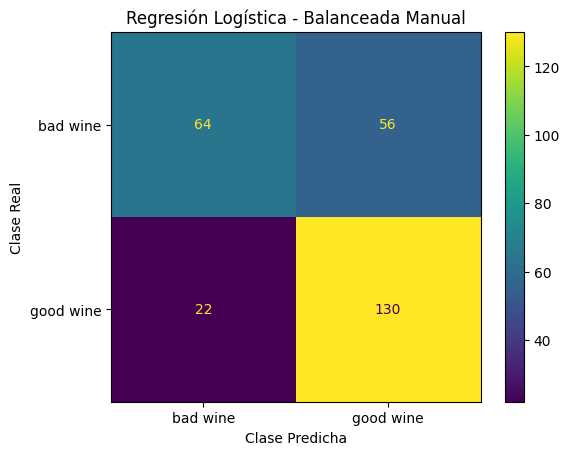

In [47]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr_pesos, labels=labels, model_name="Regresión Logística - Balanceada Manual")

Ahora, únicamente 22 vinos son predichos como malos cuando en realidad son buenos.
Pero, 56 vinos son predichos como buenos cuando en realidad son malos.
Si miramos métricas globales, es posible que este modelo sea peor. Pero consigue disminuir un tipo específico de error.

En este caso, aumentamos bastante el recall sobre la clase 1 (vino bueno), en decir, los encontramos a casi todos.

In [48]:
print("Classification Report: \n", classification_report(y_test, pred_lr_pesos))   # Se computan métricas comparando lo que debería de ser la salida con lo que predijo el modelo
muestra_metricas("LogisticRegression - Balanceada manual", y_test, pred_lr_pesos, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.53      0.62       120
           1       0.70      0.86      0.77       152

    accuracy                           0.71       272
   macro avg       0.72      0.69      0.70       272
weighted avg       0.72      0.71      0.70       272

#######################################
Accuracy: 71.32%
Recall: 71.32%
Precision: 71.89%
F1-Score: 70.40%
MCC: 41.50%
Tiempo de entrenamiento: 0.0232 s
Tiempo de predicción: 0.0004 s
Tiempo total: 0.0237 s
#######################################


Este modelo, también tiene una heurística que balancea automáticamente los pesos de las diferentes clases. En ocasiones, podría ser un buen punto de partida.

In [49]:
modelo_lr_balanced = LogisticRegression(class_weight="balanced", solver='lbfgs', max_iter=1000)    # Esta es la heurística balanceada, agregado también un nuevo límite para las iteraciones del algoritmo que resuelve (lo del ConvergenceWarning de arriba)

modelo_lr_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [50]:
pred_lr_balanced = modelo_lr_balanced.predict(X_test)

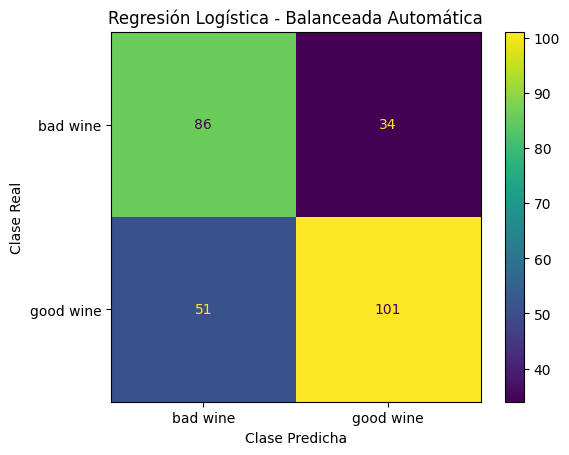

In [51]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr_balanced, labels=labels, model_name="Regresión Logística - Balanceada Automática")

In [52]:
print("Classification Report: \n", classification_report(y_test, pred_lr_balanced))   # Se computan métricas comparando lo que debería de ser la salida con lo que predijo el modelo
muestra_metricas("LogisticRegression - Balanceada automática", y_test, pred_lr_balanced, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.72      0.67       120
           1       0.75      0.66      0.70       152

    accuracy                           0.69       272
   macro avg       0.69      0.69      0.69       272
weighted avg       0.70      0.69      0.69       272

#######################################
Accuracy: 68.75%
Recall: 68.75%
Precision: 69.50%
F1-Score: 68.86%
MCC: 37.85%
Tiempo de entrenamiento: 0.0232 s
Tiempo de predicción: 0.0004 s
Tiempo total: 0.0237 s
#######################################


En este caso, el balance automático se parece mucho a sin balancear.

Por eso siempre es importante saber bien qué se busca, y con eso definir el enfoque a usar y cuál es el mejor modelo.

## Árbol de Decisión

In [53]:
from sklearn.tree import DecisionTreeClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_tree = tree_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree))
muestra_metricas("DecisionTreeClassifier", y_test, pred_tree, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.57      0.60       120
           1       0.69      0.74      0.71       152

    accuracy                           0.67       272
   macro avg       0.66      0.66      0.66       272
weighted avg       0.66      0.67      0.66       272

#######################################
Accuracy: 66.54%
Recall: 66.54%
Precision: 66.33%
F1-Score: 66.32%
MCC: 31.60%
Tiempo de entrenamiento: 0.0086 s
Tiempo de predicción: 0.0003 s
Tiempo total: 0.0089 s
#######################################


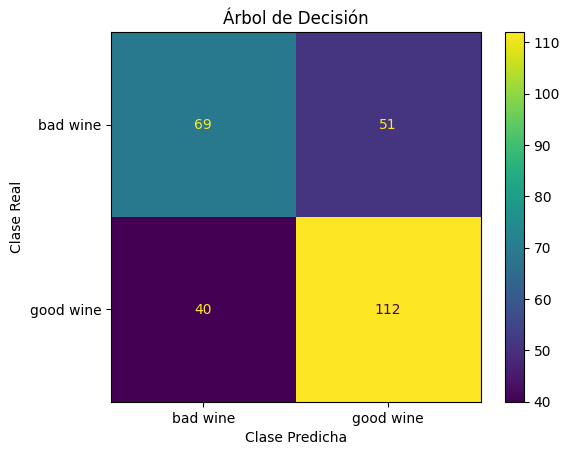

In [54]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree, labels=labels, model_name="Árbol de Decisión")

Este modelo parece que es un poco peor en este problema que el de Regresión Logística.

In [55]:
tree_clf.feature_importances_   # Este modelo permite saber la importancia que le dio a cada característica durante el ajuste de sus pesos.
                                # Está porcentual la salida. Y se corresponde con el orden de las características del arreglo de entrada.
                                # Es decir: [Tiempo, Dinero, Energía]

array([0.06148765, 0.13972809, 0.03387729, 0.06617331, 0.04671645,
       0.05113292, 0.11468399, 0.05151555, 0.05403038, 0.102628  ,
       0.27802636])

Ahora quizá tenga más sentido analizar si hay variables que poco aportan. Con esa información, podemos simplificar tanto el proceso de toma de datos en la vida real, como los datos a procesar, el tamaño del modelo necesario, etc.

In [56]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Así suelto, poco nos dice pero... podemos armar una tablita y ordenar por valores.

In [57]:
# Convert to DataFrame for easier visualization
df_importances = pd.DataFrame({
    'Variables': dataset_stan.columns,
    'Importancia DTC': tree_clf.feature_importances_,
})

df_importances.sort_values(by='Importancia DTC', ascending=False)

Variables  Importancia DTC
10               alcohol         0.278026
1       volatile acidity         0.139728
6   total sulfur dioxide         0.114684
9              sulphates         0.102628
3         residual sugar         0.066173
0          fixed acidity         0.061488
8                     pH         0.054030
7                density         0.051516
5    free sulfur dioxide         0.051133
4              chlorides         0.046716
2            citric acid         0.033877

Observemos que las 4 primeras variables son las que previamente consideramos más relevantes para la variable de salida y las 7 siguientes son las que descartábamos por correlación o por ser poco relevantes para la variable de salida.

[Text(0.5960240610328639, 0.9736842105263158, 'x[10] <= -0.261\ngini = 0.499\nsamples = 1087\nvalue = [520, 567]'),
 Text(0.3516725352112676, 0.9210526315789473, 'x[9] <= -0.08\ngini = 0.423\nsamples = 539\nvalue = [375, 164]'),
 Text(0.2729851330203443, 0.868421052631579, 'x[6] <= 1.547\ngini = 0.352\nsamples = 378\nvalue = [292, 86]'),
 Text(0.20168231611893583, 0.8157894736842105, 'x[1] <= 0.672\ngini = 0.385\nsamples = 323\nvalue = [239, 84]'),
 Text(0.09820031298904539, 0.7631578947368421, 'x[2] <= -1.265\ngini = 0.439\nsamples = 206\nvalue = [139, 67]'),
 Text(0.025039123630672927, 0.7105263157894737, 'x[7] <= -0.545\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.012519561815336464, 0.6578947368421053, 'x[1] <= 0.604\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.006259780907668232, 0.6052631578947368, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.018779342723004695, 0.6052631578947368, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03755868544600939, 0

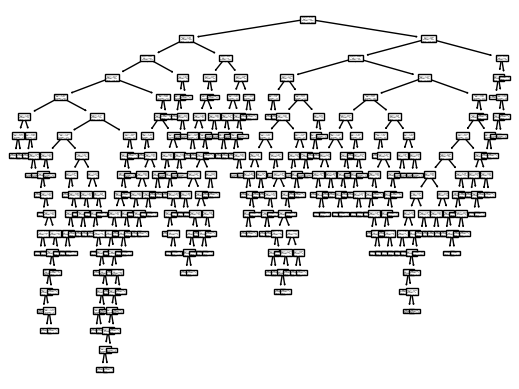

In [58]:
from sklearn import tree
tree.plot_tree(tree_clf)    # Este es un modelo que tiene una representación gráfica
                            # Podemos saber qué preguntas "se hace" el modelo y con cuál característica para identificar la clase de salida.

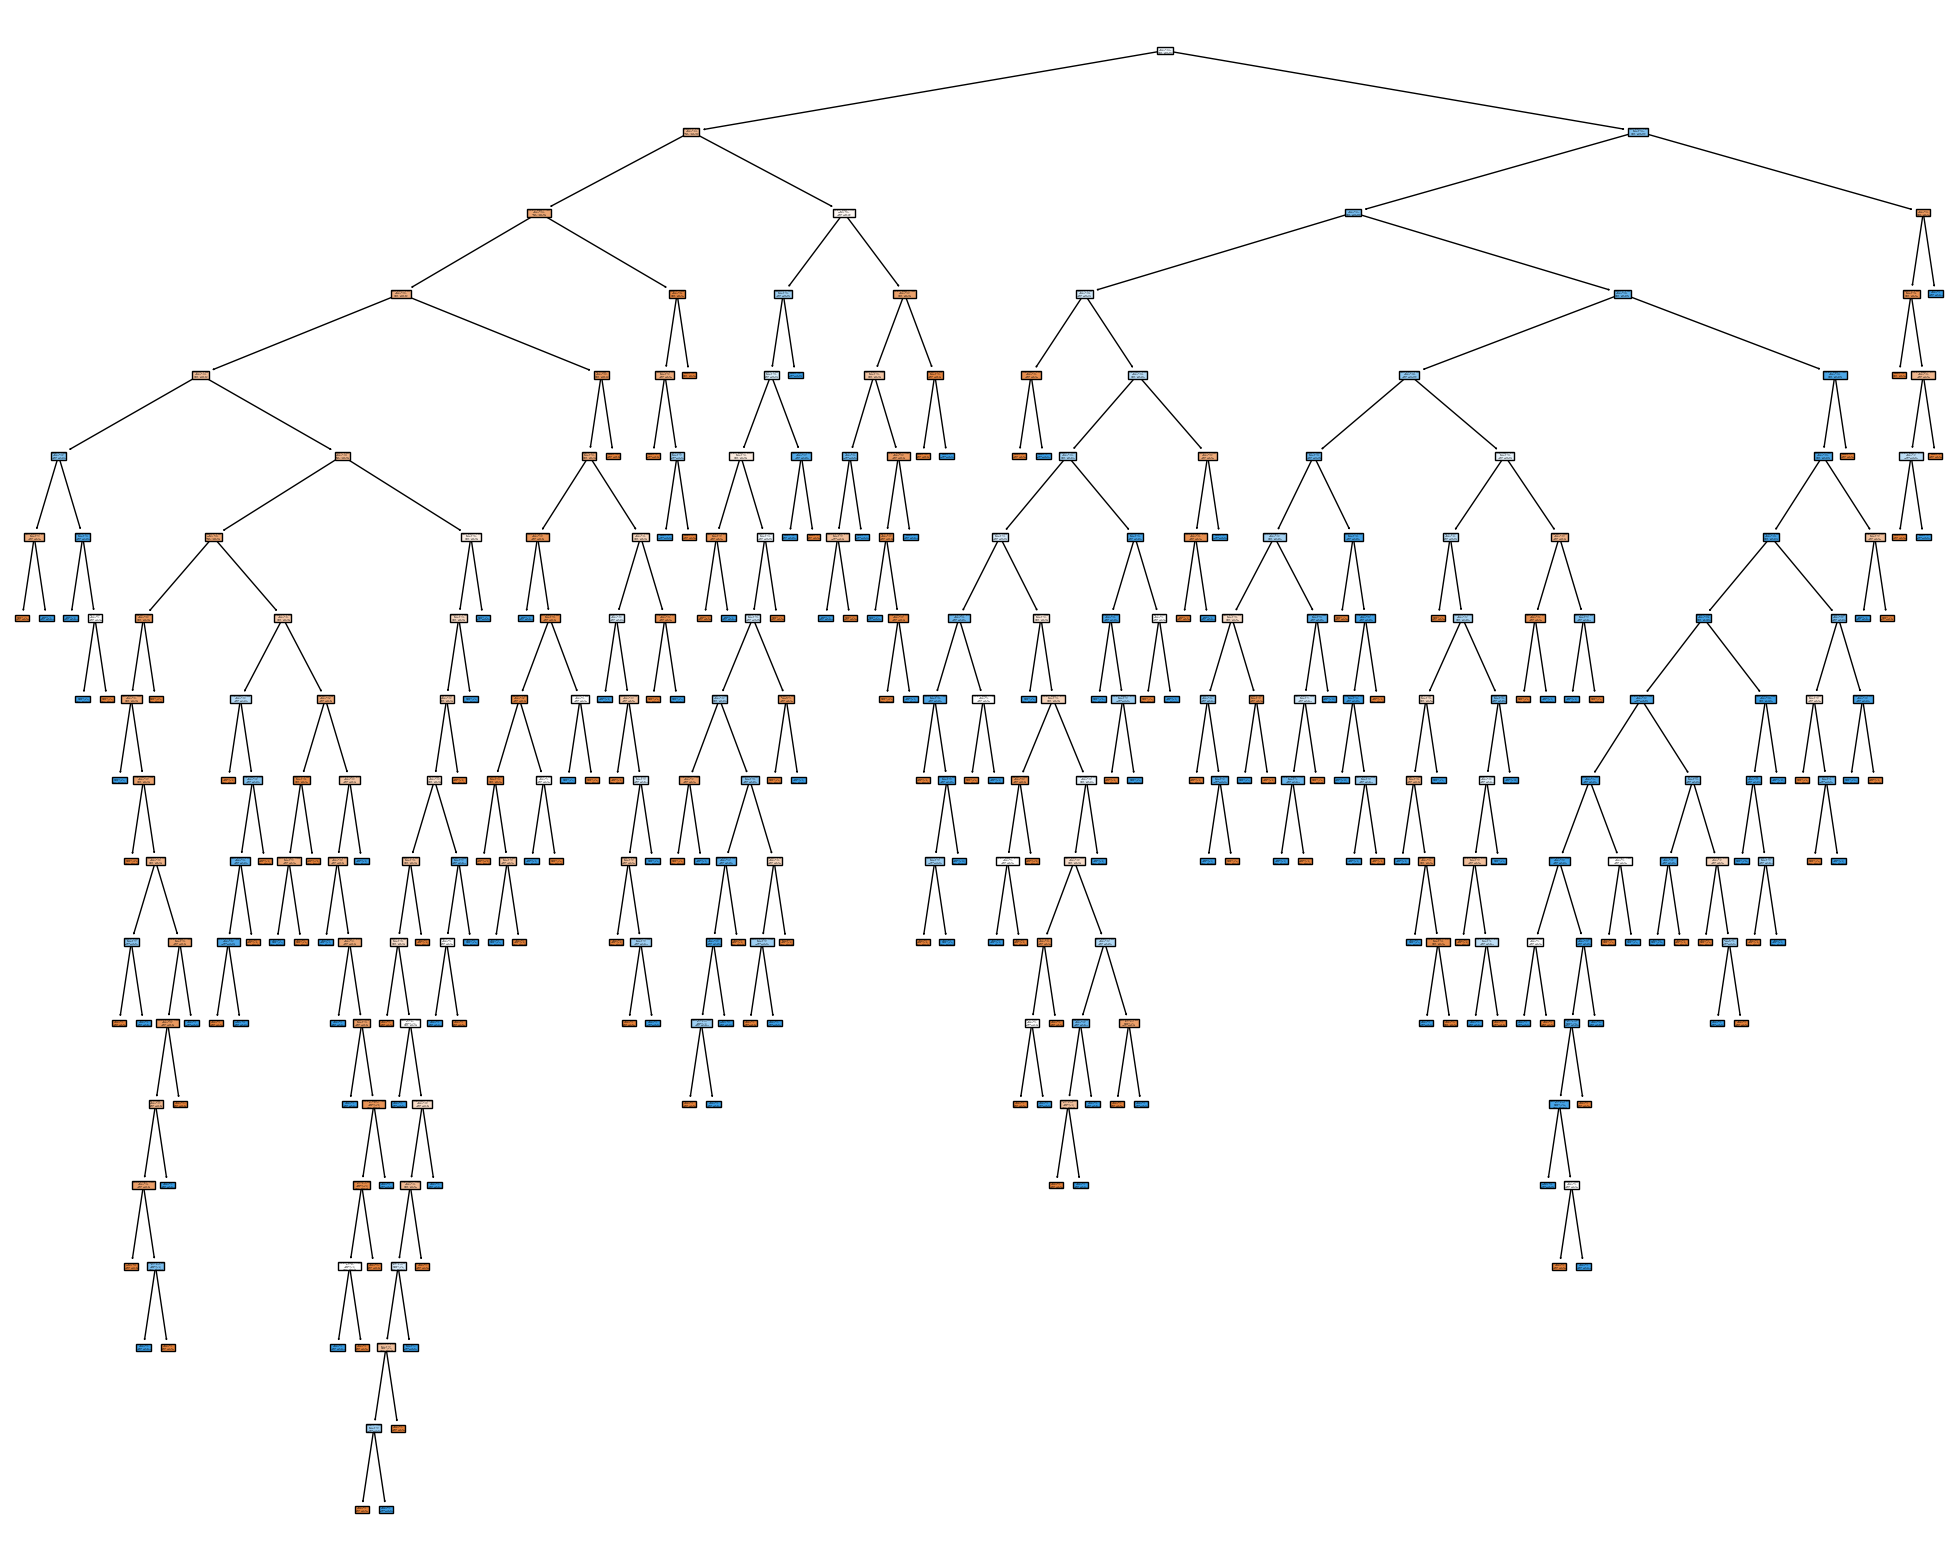

In [59]:
fig = plt.figure(figsize=(25,20))   # Configuramos un tamaño mayor, para poder ver algo
_ = tree.plot_tree(tree_clf,
                        feature_names=dataset.columns,
                        class_names=labels,
                        filled=True)
fig.savefig("decision_tree.png")  # Guardamos la imagen también, por si se necesita

## Más Modelos: misma filosofía para entrenamiento y evaluación

### K Vecinos Cercanos

In [60]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("KNeighborsClassifier", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.62      0.64       120
           1       0.71      0.73      0.72       152

    accuracy                           0.68       272
   macro avg       0.68      0.68      0.68       272
weighted avg       0.68      0.68      0.68       272

#######################################
Accuracy: 68.38%
Recall: 68.38%
Precision: 68.29%
F1-Score: 68.32%
MCC: 35.67%
Tiempo de entrenamiento: 0.0035 s
Tiempo de predicción: 0.0339 s
Tiempo total: 0.0374 s
#######################################


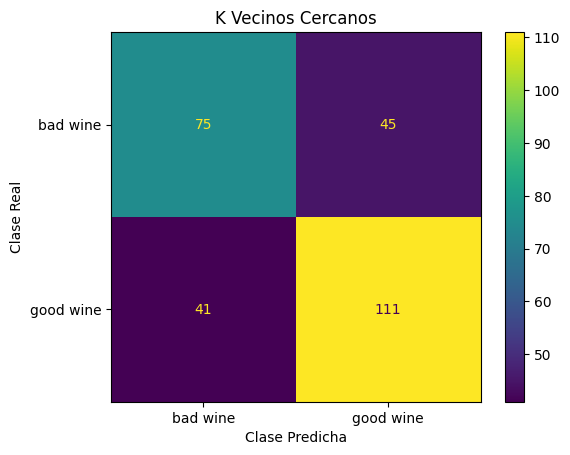

In [61]:
plot_confusion_matrix(y_test, pred_knn, labels=labels, model_name="K Vecinos Cercanos")

### Red Neuronal

In [62]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((20,))  # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_nn = nn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_nn))
muestra_metricas("Multi-layer Perceptron classifier", y_test, pred_nn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.72      0.68       120
           1       0.76      0.69      0.72       152

    accuracy                           0.70       272
   macro avg       0.70      0.70      0.70       272
weighted avg       0.71      0.70      0.70       272

#######################################
Accuracy: 70.22%
Recall: 70.22%
Precision: 70.74%
F1-Score: 70.32%
MCC: 40.47%
Tiempo de entrenamiento: 0.8209 s
Tiempo de predicción: 0.0006 s
Tiempo total: 0.8215 s
#######################################


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


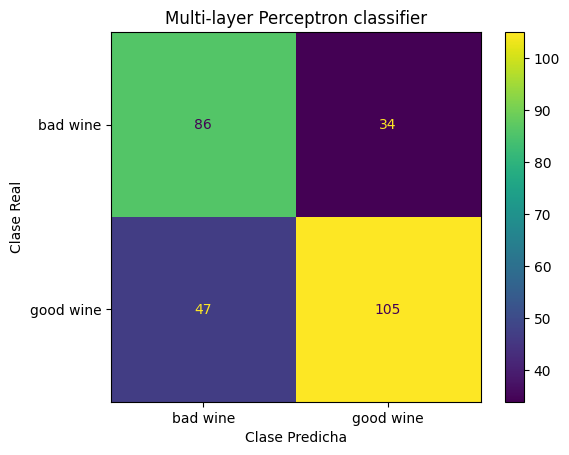

In [63]:
plot_confusion_matrix(y_test, pred_nn, labels=labels, model_name="Multi-layer Perceptron classifier")

### Support Vector Machines (SVMs)

https://scikit-learn.org/stable/modules/svm.html#classification

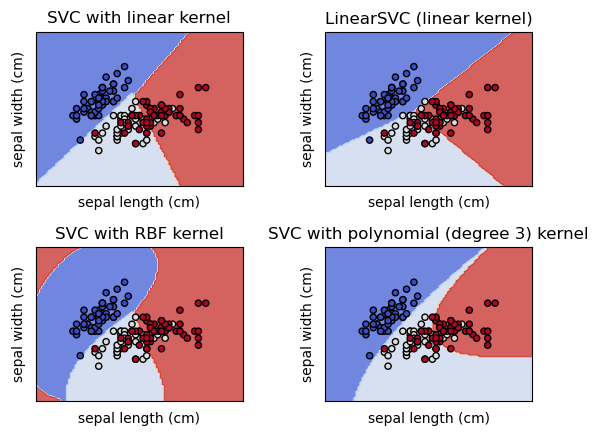

In [64]:
from sklearn.svm import SVC

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_svm = svm_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_svm))
muestra_metricas("SVM", y_test, pred_svm, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.72      0.68       120
           1       0.76      0.68      0.72       152

    accuracy                           0.70       272
   macro avg       0.70      0.70      0.70       272
weighted avg       0.71      0.70      0.70       272

#######################################
Accuracy: 69.85%
Recall: 69.85%
Precision: 70.54%
F1-Score: 69.96%
MCC: 39.98%
Tiempo de entrenamiento: 0.0770 s
Tiempo de predicción: 0.0225 s
Tiempo total: 0.0995 s
#######################################


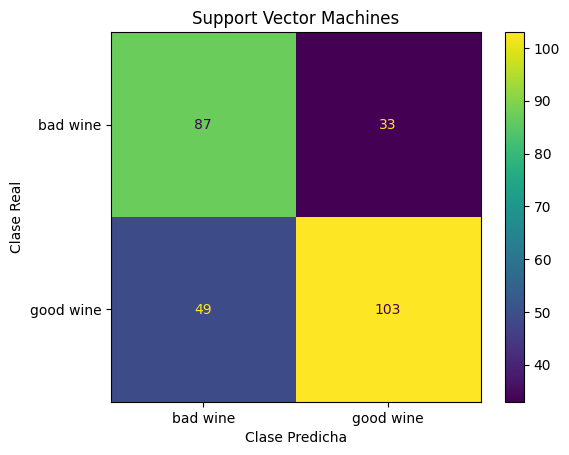

In [65]:
plot_confusion_matrix(y_test, pred_svm, labels=labels, model_name="Support Vector Machines")

### Comparación de los Modelos

Para evaluar qué modelo se ajusta mejor a nuestros requerimientos.
Por ejemplo, si la velocidad de inferencia es crucial (tiempo en la consulta del modelo)... nos interesaría el menor tiempo a la hora de predecir.

In [66]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

Podemos ver que el modelo que tiene el mejor F1-Score es la Regresión Logística con Balanceado manual, seguida de cerca por SVM pero a esta última le lleva más tiempo.

No nos olvidemos que la Regresión Logística con Balanceado manual además cumple con nuestro objetivo de predecir lo menos posible como vino malo a un vino que en realidad es bueno ya que lo descartaríamos sin probarlo, por lo que sin lugar a dudas este sería el modelo óptimo para resolver este problema.

## Desempeño sin las características poco importantes para Árboles

In [67]:
dataset_opt = dataset_stan.copy()

In [68]:
dataset_opt.drop(['citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'fixed acidity', 'residual sugar'], axis=1, inplace=True)

In [69]:
X_opt = np.asarray(dataset_opt)

In [70]:
X_opt_train, X_opt_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.2, shuffle=True, random_state=1)

In [71]:
X_opt_train.shape

(1087, 4)

## Árbol de Decisión, 4 características

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento
tree_clf_opt = DecisionTreeClassifier(random_state=1, max_depth=3)
tree_clf_opt.fit(X_opt_train, y_train)

# Predicciones
pred_tree_opt = tree_clf_opt.predict(X_opt_test)
print("Classification Report: \n", classification_report(y_test, pred_tree_opt))
muestra_metricas("DecisionTreeClassifier - 4 características", y_test, pred_tree_opt, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       120
           1       0.72      0.73      0.72       152

    accuracy                           0.69       272
   macro avg       0.68      0.68      0.68       272
weighted avg       0.69      0.69      0.69       272

#######################################
Accuracy: 68.75%
Recall: 68.75%
Precision: 68.68%
F1-Score: 68.70%
MCC: 36.46%
Tiempo de entrenamiento: 0.0770 s
Tiempo de predicción: 0.0225 s
Tiempo total: 0.0995 s
#######################################


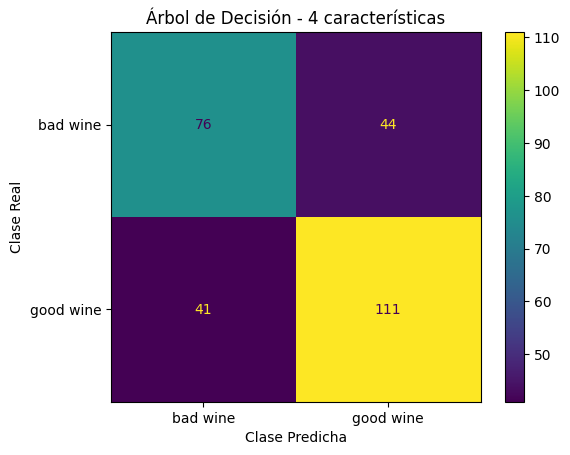

In [73]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree_opt, labels=labels, model_name="Árbol de Decisión - 4 características")

El desempeño sigue siendo casi el mismo, pero redujimos considerablemente la cantidad de datos que se usan.

In [74]:
tree_clf_opt.feature_importances_   # Este modelo permite saber la importancia que le dio a cada característica durante el ajuste de sus pesos.
                                # Está porcentual la salida. Y se corresponde con el orden de las características del arreglo de entrada.

array([0.10907241, 0.12238131, 0.0880857 , 0.68046057])

Ahora quizá tenga más sentido analizar si hay variables que poco aportan. Con esa información, podemos simplificar tanto el proceso de toma de datos en la vida real, como los datos a procesar, el tamaño del modelo necesario, etc.

In [75]:
dataset_opt.columns   # El orden de las columnas del dataset es el orden de los números del vector de importancia

Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')

Así suelto, poco nos dice pero... podemos armar una tablita y ordenar por valores.

In [76]:
# Convert to DataFrame for easier visualization
df_importances = pd.DataFrame({
    'Variables': dataset_opt.columns,
    'Importancia DTC': tree_clf_opt.feature_importances_,
})

df_importances.sort_values(by='Importancia DTC', ascending=False)

Variables  Importancia DTC
3               alcohol         0.680461
1  total sulfur dioxide         0.122381
0      volatile acidity         0.109072
2             sulphates         0.088086

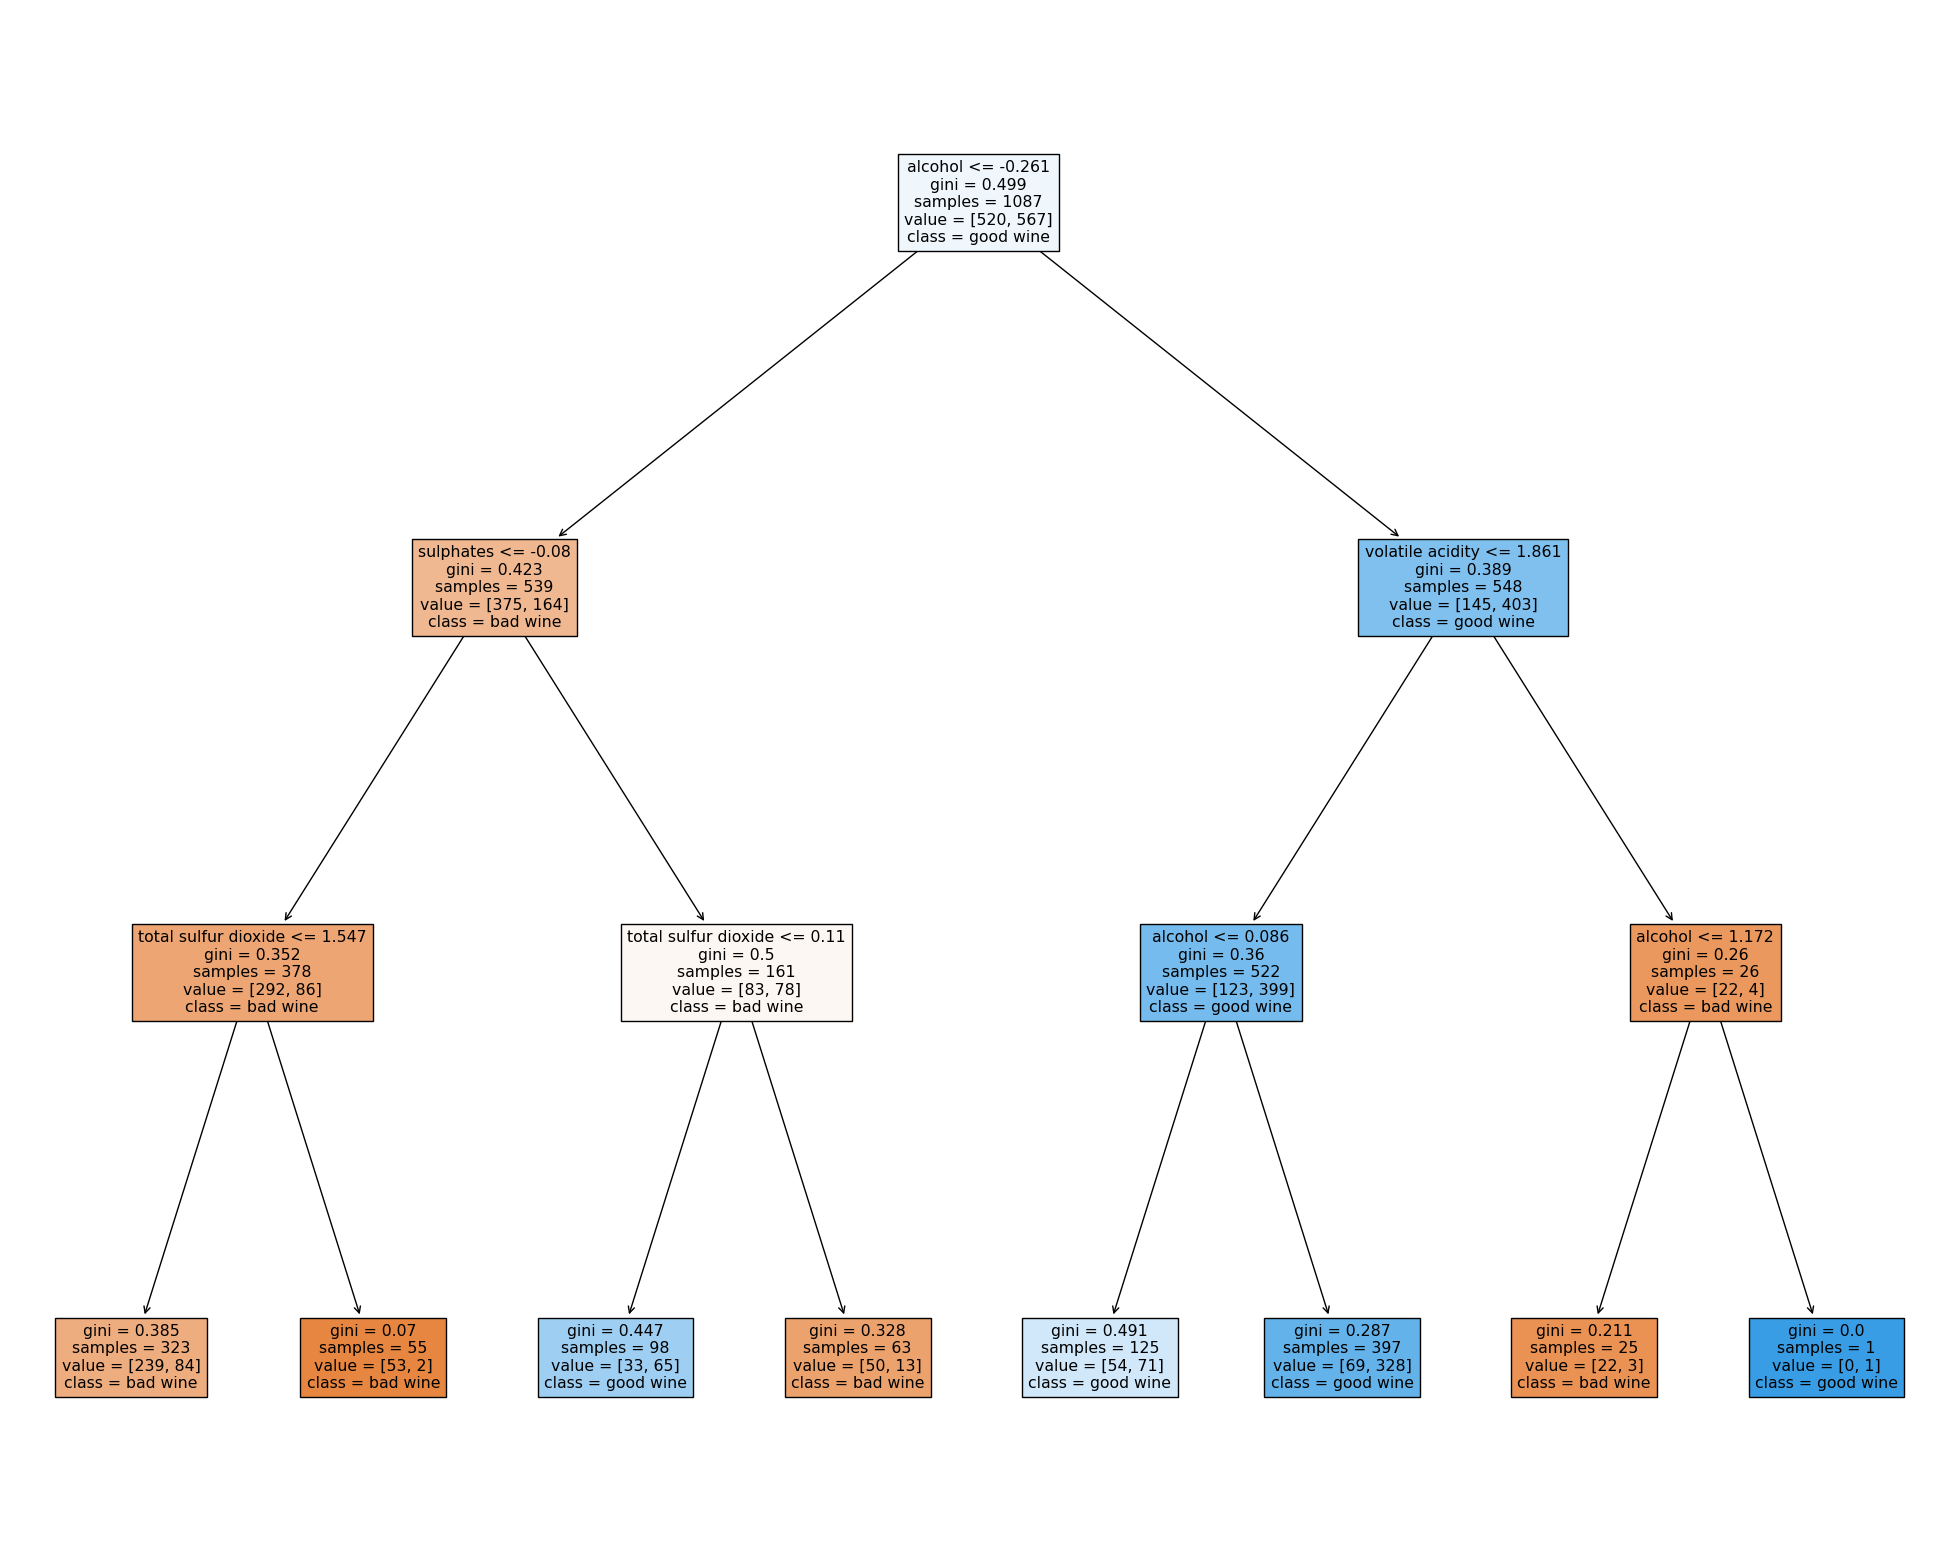

In [77]:
fig = plt.figure(figsize=(25,20))   # Configuramos un tamaño mayor, para poder ver algo
_ = tree.plot_tree(tree_clf_opt,
                        feature_names=dataset_opt.columns,
                        class_names=labels,
                        filled=True)
fig.savefig("decision_tree_opt.png")  # Guardamos la imagen también, por si se necesita

## Regresión Logística - 4 características

In [78]:
# Modelos para clasificación

from sklearn.linear_model import LogisticRegression

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_clf_opt = LogisticRegression()    # Se instancia el modelo, parámetros por defecto
lr_clf_opt.fit(X_opt_train, y_train)   # Datos para entrenar, Entrada y Salida.
end_train = time.time()

# Predicciones
pred_lr_opt = lr_clf_opt.predict(X_opt_test)   # Con la Entrada para test, se evalúa la predicción de Clase del modelo
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_lr_opt))   # Se computan métricas comparando lo que debería de ser la salida con lo que predijo el modelo
muestra_metricas("LogisticRegression - 4 características", y_test, pred_lr_opt, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.72      0.67       120
           1       0.75      0.68      0.71       152

    accuracy                           0.69       272
   macro avg       0.69      0.70      0.69       272
weighted avg       0.70      0.69      0.70       272

#######################################
Accuracy: 69.49%
Recall: 69.49%
Precision: 70.12%
F1-Score: 69.59%
MCC: 39.16%
Tiempo de entrenamiento: 0.0083 s
Tiempo de predicción: 0.0005 s
Tiempo total: 0.0088 s
#######################################


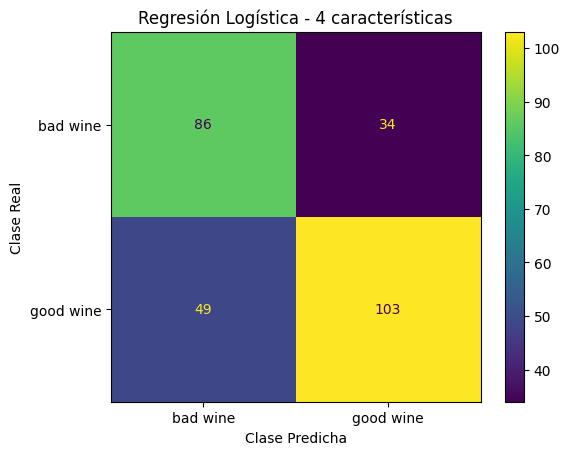

In [79]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr_opt, labels=labels, model_name="Regresión Logística - 4 características")

Vemos que nuevamente el desempeño es muy similar al de Regresión Logística con las 11 características, pero redujimos considerablemente la cantidad de datos que se usan.

## Balance de Clases - 4 características

In [80]:
modelo_lr_pesos_opt = LogisticRegression(class_weight={0:1, 1:2})    # Este argumento, cambia el peso de las clases. 1 vendría a ser la positiva para infarto.
                                                                 # Le damos una importancia de 2 respecto a 1 para no infarto.
                                                                 # Estos valores en los pesos dependen del problema, naturaleza de los datos y demás.
                                                                 # En algunos dominios de problema, este peso podría conocerse (qué tanto cuesta no detectar a alguien enfermo, por ejemplo)
modelo_lr_pesos_opt.fit(X_opt_train, y_train)   # Datos para entrenar, Entrada y Salida.

LogisticRegression(class_weight={0: 1, 1: 2})

In [81]:
pred_lr_pesos_opt = modelo_lr_pesos_opt.predict(X_opt_test)

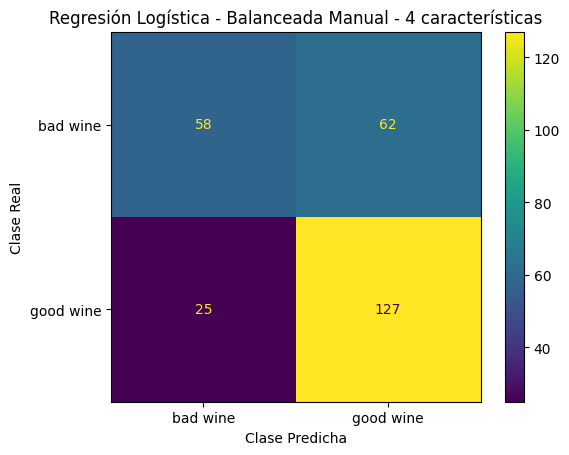

In [82]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr_pesos_opt, labels=labels, model_name="Regresión Logística - Balanceada Manual - 4 características")

En este caso empeora un poco el desempeño con respecto al de Regresión Logística con Balanceado manual con las 11 características, pero sigue siendo bastante bueno.

In [83]:
print("Classification Report: \n", classification_report(y_test, pred_lr_pesos_opt))   # Se computan métricas comparando lo que debería de ser la salida con lo que predijo el modelo
muestra_metricas("LogisticRegression - Balanceada manual - 4 características", y_test, pred_lr_pesos_opt, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.48      0.57       120
           1       0.67      0.84      0.74       152

    accuracy                           0.68       272
   macro avg       0.69      0.66      0.66       272
weighted avg       0.68      0.68      0.67       272

#######################################
Accuracy: 68.01%
Recall: 68.01%
Precision: 68.38%
F1-Score: 66.84%
MCC: 34.38%
Tiempo de entrenamiento: 0.0083 s
Tiempo de predicción: 0.0005 s
Tiempo total: 0.0088 s
#######################################


### Comparación de los Modelos

In [84]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

Concluimos hasta acá que si lo que se busca es precisión, el modelo ideal es de Regresión Logística con balanceado manual, mientras que si se busca rapidez y simplificación del modelo, se puede utilizar este modelo pero con sólo las 4 características más importantes.

# Meta-Clasificadores (Bagging, Stacking)

## Ejemplo ya implementado: Random Forest (Si puedo tener un Árbol, puedo tener un bosque)

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predicciones
pred_rf = rf_clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test, pred_rf))
muestra_metricas("Random Forest", y_test, pred_rf, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       120
           1       0.78      0.72      0.75       152

    accuracy                           0.73       272
   macro avg       0.73      0.73      0.73       272
weighted avg       0.74      0.73      0.73       272

#######################################
Accuracy: 73.16%
Recall: 73.16%
Precision: 73.68%
F1-Score: 73.25%
MCC: 46.40%
Tiempo de entrenamiento: 0.0083 s
Tiempo de predicción: 0.0005 s
Tiempo total: 0.0088 s
#######################################


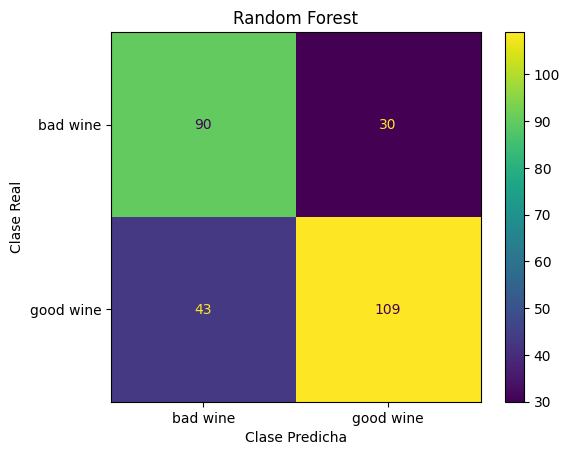

In [86]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_rf, labels=labels, model_name="Random Forest")

Vemos que el desempeño ha mejorado, pero hay más vinos buenos predichos como malos (43) que vinos malos predichos como buenos (30), y lo que queríamos era disminuir la primera cantidad.

## Ejemplo con BaggingClassifier

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Esto sería casi lo que implementa RandomForest, un conjunto de varios árboles
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True
)

"""
Esto entrena 500 árboles de decisión, donde cada árbol se entrena en un
subconjunto aleatorio del 25% de las muestras (con reemplazo).
Luego se promedian las predicciones para obtener y_pred más robusto.
"""

bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred_bag))
muestra_metricas("Random Forest - Casero", y_test, y_pred_bag, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       120
           1       0.76      0.71      0.73       152

    accuracy                           0.71       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.72      0.71      0.71       272

#######################################
Accuracy: 71.32%
Recall: 71.32%
Precision: 71.69%
F1-Score: 71.41%
MCC: 42.46%
Tiempo de entrenamiento: 0.0083 s
Tiempo de predicción: 0.0005 s
Tiempo total: 0.0088 s
#######################################


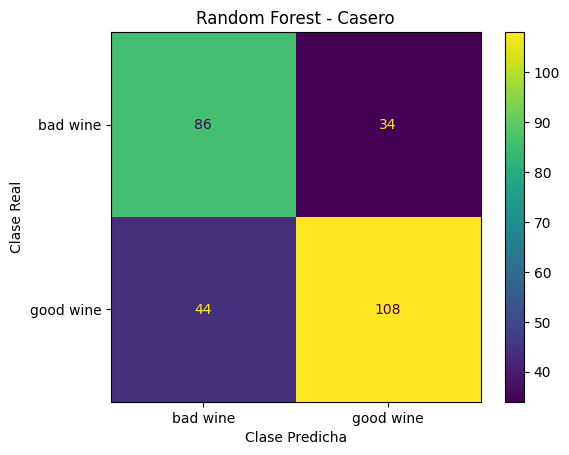

In [88]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, y_pred_bag, labels=labels, model_name="Random Forest - Casero")

Vemos que el desempeño es similar, aunque un poco peor, con respecto al Random Forest.

## Ejemplo con múltiples clasificadores (Stacking)

Para obtener un modelo que combine varios modelos, se puede utilizar un enfoque de ensamblado llamado "Stacking" (apilamiento). El apilamiento es un meta-ensamblaje que combina múltiples modelos base para mejorar el rendimiento de la predicción

In [89]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear modelos base (en este ejemplo, un árbol de decisión, un SVM y un k-NN)
base_model_1 = DecisionTreeClassifier()
base_model_2 = SVC()
base_model_3 = KNeighborsClassifier()

# Crear un StackingClassifier  con los modelos base
stacking_model = StackingClassifier(estimators=[('DT', base_model_1), ('SVM', base_model_2), ('KNN', base_model_3)])

# Entrenar el BaggingClassifier en los datos de entrenamiento
stacking_model.fit(X_train, y_train)

# Predict
y_pred_stm = stacking_model.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred_stm))
muestra_metricas("StackingClassifier", y_test, y_pred_stm, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.72      0.69       120
           1       0.76      0.70      0.73       152

    accuracy                           0.71       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.71      0.71      0.71       272

#######################################
Accuracy: 70.96%
Recall: 70.96%
Precision: 71.47%
F1-Score: 71.05%
MCC: 41.95%
Tiempo de entrenamiento: 0.0083 s
Tiempo de predicción: 0.0005 s
Tiempo total: 0.0088 s
#######################################


El *StackingClassifier* combina las predicciones de los modelos base y utiliza el meta-estimador para hacer la predicción final.

Este enfoque de apilamiento a menudo conduce a un mejor rendimiento predictivo en comparación con el uso de modelos individuales.

El meta-clasificador se define con el argumento `final_estimator`, por defecto es **LogisticRegression**.

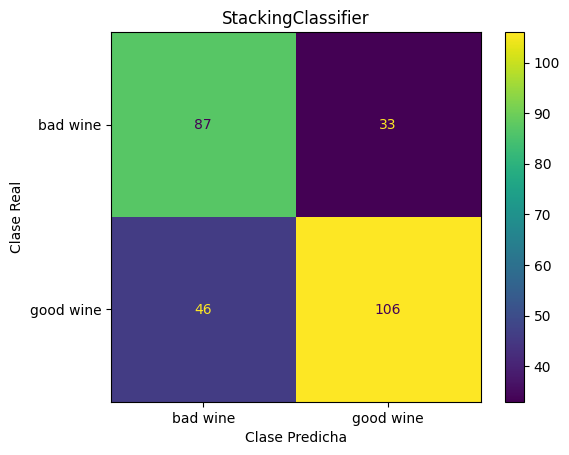

In [90]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, y_pred_stm, labels=labels, model_name="StackingClassifier")

Vemos que el desempeño es similar, aunque un poco peor, con respecto al Bagging Classifier.

## ¿Cómo saber qué parámetros llevan a un modelo óptimo?

Haremos una búsqueda en cuadrícula (GridSearchCV) para encontrar los mejores parámetros para la regresión aleatoria de bosques

In [91]:
# número de árboles en un bosque aleatorio
n_estimators = np.arange(50, 500, 25)
# número de características a considerar al buscar la mejor división
max_features = ['sqrt', 'log2']
# número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 4]
# número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2]
# método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]

NOTA: estos parámetros son evidentes si se conoce a profundidad el funcionamiento del método.

De forma rápida, Ctrl+Click sobre la clase, abre la documentación.

In [92]:
# Crearemos una grilla de parámetros
param_grid = {
            "n_estimators" : n_estimators,
            "max_features" : max_features,
            "min_samples_split" : min_samples_split,
            "min_samples_leaf" : min_samples_leaf,
            "bootstrap" : bootstrap
            }

In [93]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
# Se prepara el objeto encargado de probar las combinaciones elegidas
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=4)
                # cv: cross-validation, Para entradas de int/None, si el estimador es un clasificador y y es binario o multiclase, se utiliza StratifiedKFold. En todos los demás casos, se utiliza KFold
                # n_jobs: Número de trabajos a ejecutar en paralelo. None significa 1 a menos que esté en un contexto joblib.parallel_backend. -1 significa usar todos los procesadores.

In [94]:
rf_grid.fit(X_train, y_train) # Tarda unos 10 min

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475])},
             verbose=2)

In [95]:
# Obtendremos los mejores parámetros
rf_grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 450}

In [96]:
# Creamos el modelo con los parámetros óptimos (del espacio que buscamos)
rf_tuneado = RandomForestClassifier(**rf_grid.best_params_)  # Acá entra el desempaquetado del diccionario para los parámetros (**)

In [97]:
rf_tuneado.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       n_estimators=450)

In [98]:
pred_rf_tuneado = rf_tuneado.predict(X_test)

In [99]:
print("Classification Report: \n", classification_report(y_test, pred_rf_tuneado))
muestra_metricas("GridSearchCV", y_test, pred_rf_tuneado, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       120
           1       0.77      0.74      0.76       152

    accuracy                           0.74       272
   macro avg       0.73      0.73      0.73       272
weighted avg       0.74      0.74      0.74       272

#######################################
Accuracy: 73.53%
Recall: 73.53%
Precision: 73.71%
F1-Score: 73.59%
MCC: 46.64%
Tiempo de entrenamiento: 0.0083 s
Tiempo de predicción: 0.0005 s
Tiempo total: 0.0088 s
#######################################


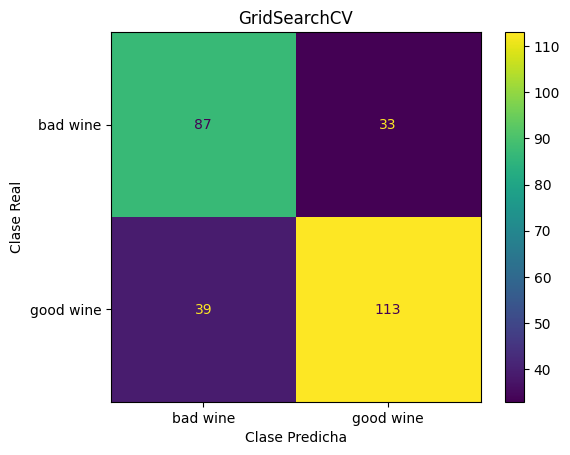

In [100]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_rf_tuneado, labels=labels, model_name="GridSearchCV")

Por lo tanto, de los modelos meta-clasificadores, este es el de mejor desempeño.

## Comparación de los modelos

In [101]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

Concluimos entonces que:

*   Si lo que se busca es precisión, el modelo ideal es de Grid Search CV, aunque hay que considerar que le llevó aproximadamente 10 minutos encontrar los mejores parámetros.
*   En segundo lugar, sigue el Random Forest que con una precisión similar, es mucho más rápido.
*   Finalmente, si lo que se busca es cumplir con el objetivo de predecir lo menos posible como vino malo a un vino que en realidad es bueno, entonces lo ideal es utilizar Regresión Logística con balanceado manual.

# Referencias y Recursos

*   https://numpy.org/doc/stable/
*   https://pandas.pydata.org/
*   https://seaborn.pydata.org/
*   https://matplotlib.org/
*   https://matplotlib.org/stable/plot_types/index.html
*   https://scikit-learn.org/stable/supervised_learning.html
*   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html